In [1]:
import pandas as pd
import ab
from statsmodels.stats.proportion import proportions_ztest, proportion_confint, proportions_chisquare
import math 
from scipy.stats import ttest_ind_from_stats
import numpy as np
import random
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import hashlib

In [2]:
df = pd.read_csv('C:/Users/a.al.kosheleva/analytics/kosheleva_a/files/carousel_similar_products_ab.csv')
df

,test,group_field,os,user_pseudo_id,success_count_orders,cancel_count_orders,success_count_orders_flg,cancel_count_orders_flg,orders_flg,count_orders,revenue,margin,complete_purchase_flg,complete_purchase,add_to_cart_flg,add_to_cart,add_to_cart_similar_products_flg,add_to_cart_similar_products,view_item_similar_products_flg,view_item_similar_products
0,218,0,iOS,E634E0AA73BA412EA9E46DD71528B2D4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,218,0,iOS,EB6A27676EFB4D2A8876E84E77ABFDF2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,218,0,iOS,367DFD6A111A4691A6F86A38A1000E27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,218,1,iOS,82D0A46CBAB548D9A08924A764C3EB02,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,218,0,iOS,F73B3D4E8AC94BE5A9DA918B63CC8F2F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,217,0,Android,d6938a49f9578901943085868ebe1753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2729,217,0,Android,6df4af6dab09733d9cf8a08913181980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2730,217,0,Android,37f23fef5edd27918c1dd4aac92ae8ad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2731,217,0,Android,859df3e7e98e05ec6b09d2b92b658744,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df3_android = df[df.os == 'Android']
df3_android['user_pseudo_id'].nunique()

2402

In [4]:
df3_ios = df[df.os == 'iOS']
df3_ios['user_pseudo_id'].nunique()

331

In [12]:
list_user_pseudo_id = list(df['user_pseudo_id'])
bakets =[]
test_group = []
for i in range(0,len(list_user_pseudo_id)):
    bakets.append(hash(list_user_pseudo_id[i]+'exp_edit_info')%50)
#     if df['group_field'][i] == 1:
#         test_group.append(1)
#     else:
#         test_group.append(0)
df['bakets'] = bakets
# df['group_field'] = test_group

In [13]:
df3_android = df[df['os'] == 'Android']
df3_ios = df[df['os'] == 'iOS']
control_android = df3_android[df3_android['group_field'] == 0]
test_android = df3_android[df3_android['group_field'] == 1]
control_ios = df3_ios[df3_ios['group_field'] == 0]
test_ios = df3_ios[df3_ios['group_field'] == 1]

In [14]:
list_metrics = ['orders_flg', 'complete_purchase_flg', 'success_count_orders_flg', 'cancel_count_orders_flg', 
                'add_to_cart_flg', 'add_to_cart_similar_products_flg']

control_android_users = control_android.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
test_android_users = test_android.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
control_ios_users = control_ios.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
test_ios_users = test_ios.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']

for i in range(0,len(list_metrics),1):
    control_android_metrics = control_android.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    test_android_metrics = test_android.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    control_ios_metrics = control_ios.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    test_ios_metrics = test_ios.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    print(list_metrics[i],'\n')
    print('Android')
    z_stat, pval = proportions_ztest([control_android_metrics[0], test_android_metrics[0]], nobs=[control_android_users[0], test_android_users[0]])
    # # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
    print(f'z statistic: {z_stat:.2f}')
    print(f'p-value: {pval:.3f}')
    print('test group', test_android_metrics[0]/test_android_users[0])
    print('control group', control_android_metrics[0]/control_android_users[0])
    
    
    print('\niOS')

    z_stat, pval = proportions_ztest([control_ios_metrics[0], test_ios_metrics[0]], nobs=[control_ios_users[0], test_ios_users[0]])
    # # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
    print(f'z statistic: {z_stat:.2f}')
    print(f'p-value: {pval:.3f}')
    print('test group', test_ios_metrics[0]/test_ios_users[0])
    print('control group', control_ios_metrics[0]/control_ios_users[0])

    print('\n')

orders_flg 

Android
z statistic: -0.32
p-value: 0.746
test group 0.14015477214101463
control group 0.13559322033898305

iOS
z statistic: 1.65
p-value: 0.100
test group 0.12345679012345678
control group 0.1893491124260355


complete_purchase_flg 

Android
z statistic: -0.32
p-value: 0.746
test group 0.14015477214101463
control group 0.13559322033898305

iOS
z statistic: 1.65
p-value: 0.100
test group 0.12345679012345678
control group 0.1893491124260355


success_count_orders_flg 

Android
z statistic: -0.43
p-value: 0.668
test group 0.13671539122957868
control group 0.13075060532687652

iOS
z statistic: 1.85
p-value: 0.064
test group 0.1111111111111111
control group 0.1834319526627219


cancel_count_orders_flg 

Android
z statistic: 0.14
p-value: 0.892
test group 0.0060189165950128975
control group 0.00645682001614205

iOS
z statistic: -0.04
p-value: 0.966
test group 0.012345679012345678
control group 0.011834319526627219


add_to_cart_flg 

Android
z statistic: 0.90
p-value: 0.366
tes

In [15]:
list_metrics = ['count_orders', 'success_count_orders', 'cancel_count_orders', 'revenue', 'margin','complete_purchase']

for i in range(0,len(list_metrics),1):
    print(list_metrics[i],'\n')
    print('\nAndroid')
    control_bakets = control_android.groupby('bakets').mean()[list_metrics[i]]
    test_bakets = test_android.groupby('bakets').mean()[list_metrics[i]]
    print(stats.ttest_ind(control_bakets, test_bakets))
    print(test_bakets.mean(), control_bakets.mean())
    print('iOS')
    control_bakets = control_ios.groupby('bakets').mean()[list_metrics[i]]
    test_bakets = test_ios.groupby('bakets').mean()[list_metrics[i]]
    print(stats.ttest_ind(control_bakets, test_bakets))
    print(test_bakets.mean(), control_bakets.mean())
    print('\n')


count_orders 


Android
Ttest_indResult(statistic=-0.19482532296054805, pvalue=0.8459330268393722)
0.14316443353065694 0.14033419831658217
iOS
Ttest_indResult(statistic=1.5780022262672448, pvalue=0.11785472012510591)
0.1264577259475219 0.20733722060252668


success_count_orders 


Android
Ttest_indResult(statistic=-0.24532702062546452, pvalue=0.8067162413836353)
0.13734545482352956 0.13373453420027967
iOS
Ttest_indResult(statistic=1.3397714357958084, pvalue=0.1834825253100643)
0.1206268221574344 0.1787657920310981


cancel_count_orders 


Android
Ttest_indResult(statistic=0.2535489827493707, pvalue=0.8003751762281328)
0.005818978707127376 0.006599664116302486
iOS
Ttest_indResult(statistic=1.0243520838271556, pvalue=0.30824330519842275)
0.0058309037900874635 0.02857142857142857


revenue 


Android
Ttest_indResult(statistic=nan, pvalue=nan)
0.0 0.0
iOS
Ttest_indResult(statistic=nan, pvalue=nan)
0.0 0.0


margin 


Android
Ttest_indResult(statistic=nan, pvalue=nan)
0.0 0.0
iOS
Ttest_indR

In [16]:
#выбравшие сортировку
df_sorting = df[df.sorting_show_type_flg > 0]

AttributeError: 'DataFrame' object has no attribute 'sorting_show_type_flg'

In [ ]:
list_user_pseudo_id = list(df_sorting['user_pseudo_id'])
bakets =[]
test_group = []
for i in range(0,len(list_user_pseudo_id)):
    bakets.append(hash(list_user_pseudo_id[i]+'exp_edit_info')%100)
#     if df['group_field'][i] == 1:
#         test_group.append(1)
#     else:
#         test_group.append(0)
df_sorting['bakets'] = bakets
# df['group_field'] = test_group

In [15]:
df3_android = df_sorting[df_sorting['os'] == 'Android']
df3_ios = df_sorting[df_sorting['os'] == 'iOS']

control_android = df3_android[df3_android['group_field'] == 0]
test_android = df3_android[df3_android['group_field'] == 1]
control_ios = df3_ios[df3_ios['group_field'] == 0]
test_ios = df3_ios[df3_ios['group_field'] == 1]

In [16]:
list_metrics = ['sorting_show_type_flg', 'sorting_change_type_flg']

control_android_users = control_android.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
test_android_users = test_android.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
control_ios_users = control_ios.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
test_ios_users = test_ios.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']

for i in range(0,len(list_metrics),1):
    control_android_metrics = control_android.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    test_android_metrics = test_android.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    control_ios_metrics = control_ios.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    test_ios_metrics = test_ios.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    print(list_metrics[i],'\n')
    print('Android')
    z_stat, pval = proportions_ztest([control_android_metrics[0], test_android_metrics[0]], nobs=[control_android_users[0], test_android_users[0]])
    # # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
    print(f'z statistic: {z_stat:.2f}')
    print(f'p-value: {pval:.3f}')
    print('test group', test_android_metrics[0]/test_android_users[0])
    print('control group', control_android_metrics[0]/control_android_users[0])
    
    
    print('\niOS')

    z_stat, pval = proportions_ztest([control_ios_metrics[0], test_ios_metrics[0]], nobs=[control_ios_users[0], test_ios_users[0]])
    # # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
    print(f'z statistic: {z_stat:.2f}')
    print(f'p-value: {pval:.3f}')
    print('test group', test_ios_metrics[0]/test_ios_users[0])
    print('control group', control_ios_metrics[0]/control_ios_users[0])

    print('\n')

sorting_show_type_flg 

Android
z statistic: nan
p-value: nan
test group 1.0
control group 1.0

iOS
z statistic: nan
p-value: nan
test group 1.0
control group 1.0


sorting_change_type_flg 

Android
z statistic: -24.43
p-value: 0.000
test group 0.8692863965070269
control group 0.7620336250575771

iOS
z statistic: -5.40
p-value: 0.000
test group 0.9278260869565217
control group 0.8997294555292527




In [17]:
#выбравшие фильтр
df_filter = df[df.filter_shown_flg > 0]

In [18]:
list_user_pseudo_id = list(df_filter['user_pseudo_id'])
bakets =[]
test_group = []
for i in range(0,len(list_user_pseudo_id)):
    bakets.append(hash(list_user_pseudo_id[i]+'exp_edit_info')%200)
#     if df['group_field'][i] == 1:
#         test_group.append(1)
#     else:
#         test_group.append(0)
df_filter['bakets'] = bakets
# df['group_field'] = test_group

df3_android = df_filter[df_filter['os'] == 'Android']
df3_ios = df_filter[df_filter['os'] == 'iOS']

control_android = df3_android[df3_android['group_field'] == 0]
test_android = df3_android[df3_android['group_field'] == 1]
control_ios = df3_ios[df3_ios['group_field'] == 0]
test_ios = df3_ios[df3_ios['group_field'] == 1]

C:\Users\AAL~1.KOS\AppData\Local\Temp/ipykernel_5168/3842599137.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['bakets'] = bakets


In [19]:
list_metrics = ['filter_shown_flg', 'filter_select_flg']

control_android_users = control_android.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
test_android_users = test_android.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
control_ios_users = control_ios.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
test_ios_users = test_ios.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']

for i in range(0,len(list_metrics),1):
    control_android_metrics = control_android.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    test_android_metrics = test_android.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    control_ios_metrics = control_ios.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    test_ios_metrics = test_ios.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    print(list_metrics[i],'\n')
    print('Android')
    z_stat, pval = proportions_ztest([control_android_metrics[0], test_android_metrics[0]], nobs=[control_android_users[0], test_android_users[0]])
    # # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
    print(f'z statistic: {z_stat:.2f}')
    print(f'p-value: {pval:.3f}')
    print('test group', test_android_metrics[0]/test_android_users[0])
    print('control group', control_android_metrics[0]/control_android_users[0])
    
    
    print('\niOS')

    z_stat, pval = proportions_ztest([control_ios_metrics[0], test_ios_metrics[0]], nobs=[control_ios_users[0], test_ios_users[0]])
    # # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
    print(f'z statistic: {z_stat:.2f}')
    print(f'p-value: {pval:.3f}')
    print('test group', test_ios_metrics[0]/test_ios_users[0])
    print('control group', control_ios_metrics[0]/control_ios_users[0])

    print('\n')

filter_shown_flg 

Android
z statistic: nan
p-value: nan
test group 1.0
control group 1.0

iOS
z statistic: nan
p-value: nan
test group 1.0
control group 1.0


filter_select_flg 

Android
z statistic: 14.81
p-value: 0.000
test group 0.5413582934262081
control group 0.6573001158748552

iOS
z statistic: 11.26
p-value: 0.000
test group 0.497610513739546
control group 0.6508367254635912




In [28]:
#положившие товар в корзину
df_cart = df[df.add_to_cart_flg  > 0]

In [29]:
list_user_pseudo_id = list(df_cart['user_pseudo_id'])
bakets =[]
test_group = []
for i in range(0,len(list_user_pseudo_id)):
    bakets.append(hash(list_user_pseudo_id[i]+'exp_edit_info')%200)
#     if df['group_field'][i] == 1:
#         test_group.append(1)
#     else:
#         test_group.append(0)
df_cart['bakets'] = bakets
# df['group_field'] = test_group

df3_android = df_cart[df_cart['os'] == 'Android']
df3_ios = df_cart[df_cart['os'] == 'iOS']

control_android = df3_android[df3_android['group_field'] == 0]
test_android = df3_android[df3_android['group_field'] == 1]
control_ios = df3_ios[df3_ios['group_field'] == 0]
test_ios = df3_ios[df3_ios['group_field'] == 1]

C:\Users\AAL~1.KOS\AppData\Local\Temp/ipykernel_5168/1688944970.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cart['bakets'] = bakets


In [30]:
list_metrics = ['add_to_cart_flg', 'click_checkout_flg']

control_android_users = control_android.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
test_android_users = test_android.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
control_ios_users = control_ios.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
test_ios_users = test_ios.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']

for i in range(0,len(list_metrics),1):
    control_android_metrics = control_android.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    test_android_metrics = test_android.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    control_ios_metrics = control_ios.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    test_ios_metrics = test_ios.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    print(list_metrics[i],'\n')
    print('Android')
    z_stat, pval = proportions_ztest([control_android_metrics[0], test_android_metrics[0]], nobs=[control_android_users[0], test_android_users[0]])
    # # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
    print(f'z statistic: {z_stat:.2f}')
    print(f'p-value: {pval:.3f}')
    print('test group', test_android_metrics[0]/test_android_users[0])
    print('control group', control_android_metrics[0]/control_android_users[0])
    
    
    print('\niOS')

    z_stat, pval = proportions_ztest([control_ios_metrics[0], test_ios_metrics[0]], nobs=[control_ios_users[0], test_ios_users[0]])
    # # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
    print(f'z statistic: {z_stat:.2f}')
    print(f'p-value: {pval:.3f}')
    print('test group', test_ios_metrics[0]/test_ios_users[0])
    print('control group', control_ios_metrics[0]/control_ios_users[0])

    print('\n')

add_to_cart_flg 

Android
z statistic: nan
p-value: nan
test group 1.0
control group 1.0

iOS
z statistic: nan
p-value: nan
test group 1.0
control group 1.0


click_checkout_flg 

Android
z statistic: 6.18
p-value: 0.000
test group 0.5694963236739669
control group 0.588501835423677

iOS
z statistic: 2.61
p-value: 0.009
test group 0.5879915624529155
control group 0.5991086266807675




C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


In [37]:
#кликнувшие на чекаут
df_checkout = df[df.click_checkout_flg  > 0]

In [38]:
df_checkout[df_checkout.complete_purchase_flg >0]

,test,group_field,os,user_pseudo_id,success_count_orders,cancel_count_orders,success_count_orders_flg,cancel_count_orders_flg,orders_flg,count_orders,...,add_to_cart_cart_flg,add_to_cart_favorites_flg,add_to_cart_previous_orders_flg,add_to_cart_recommendation_cart_flg,add_to_cart_recommendations_goods_cart_flg,add_to_cart_repeat_order_flg,add_to_cart_similar_products_flg,click_checkout_flg,error_flg,bakets
8,201,1,iOS,99FE8A9A8415432E82ECD194A77D87C7,1,0,1,0,1,1,...,0,0,0,0,0,0,0,1,1,260
14,201,0,iOS,6D878ECD735140FAB7076256732D6E60,1,0,1,0,1,1,...,0,1,0,1,0,0,0,1,0,360
16,201,1,iOS,3A965C5546874BA999379DD13BCEFFF7,1,0,1,0,1,1,...,1,0,0,1,0,0,0,1,0,265
17,201,1,iOS,9A756CECB532433E84A7E0FADEA1D91D,1,0,1,0,1,1,...,1,0,0,0,0,0,0,1,0,192
20,201,1,iOS,75C8C24070D147FD9930367B443827AF,5,0,1,0,1,5,...,0,0,0,0,0,0,0,1,1,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488949,200,1,Android,21ee55da46fab68df43a25594fa013e9,1,0,1,0,1,1,...,1,0,0,0,0,0,0,1,0,176
488994,200,0,Android,ac4cb064b25560132e9b4dcc853b40f6,1,0,1,0,1,1,...,1,0,0,0,1,0,0,1,0,146
489014,200,0,Android,92844d25952b2a1792e4d06baac0d5f4,1,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,36
489096,200,1,Android,1273498f1dd710e9e908f2010d6727d9,1,0,1,0,1,1,...,0,0,0,0,0,0,0,1,1,305


In [39]:
list_user_pseudo_id = list(df_checkout['user_pseudo_id'])
bakets =[]
test_group = []
for i in range(0,len(list_user_pseudo_id)):
    bakets.append(hash(list_user_pseudo_id[i]+'exp_edit_info')%200)
#     if df['group_field'][i] == 1:
#         test_group.append(1)
#     else:
#         test_group.append(0)
df_checkout['bakets'] = bakets
# df['group_field'] = test_group

df3_android = df_checkout[df_checkout['os'] == 'Android']
df3_ios = df_checkout[df_checkout['os'] == 'iOS']

control_android = df3_android[df3_android['group_field'] == 0]
test_android = df3_android[df3_android['group_field'] == 1]
control_ios = df3_ios[df3_ios['group_field'] == 0]
test_ios = df3_ios[df3_ios['group_field'] == 1]

C:\Users\AAL~1.KOS\AppData\Local\Temp/ipykernel_5168/3136349246.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['bakets'] = bakets


In [41]:
list_metrics = ['click_checkout_flg', 'success_count_orders_flg']

control_android_users = control_android.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
test_android_users = test_android.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
control_ios_users = control_ios.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
test_ios_users = test_ios.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']

for i in range(0,len(list_metrics),1):
    control_android_metrics = control_android.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    test_android_metrics = test_android.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    control_ios_metrics = control_ios.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    test_ios_metrics = test_ios.groupby(['group_field', 'os']).sum().reset_index()[list_metrics[i]]
    print(list_metrics[i],'\n')
    print('Android')
    z_stat, pval = proportions_ztest([control_android_metrics[0], test_android_metrics[0]], nobs=[control_android_users[0], test_android_users[0]])
    # # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
    print(f'z statistic: {z_stat:.2f}')
    print(f'p-value: {pval:.3f}')
    print('test group', test_android_metrics[0]/test_android_users[0])
    print('control group', control_android_metrics[0]/control_android_users[0])
    
    
    print('\niOS')

    z_stat, pval = proportions_ztest([control_ios_metrics[0], test_ios_metrics[0]], nobs=[control_ios_users[0], test_ios_users[0]])
    # # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
    print(f'z statistic: {z_stat:.2f}')
    print(f'p-value: {pval:.3f}')
    print('test group', test_ios_metrics[0]/test_ios_users[0])
    print('control group', control_ios_metrics[0]/control_ios_users[0])

    print('\n')

click_checkout_flg 

Android
z statistic: nan
p-value: nan
test group 1.0
control group 1.0

iOS
z statistic: nan
p-value: nan
test group 1.0
control group 1.0


success_count_orders_flg 

Android
z statistic: -0.42
p-value: 0.674
test group 0.9708441825407702
control group 0.9702647789208888

iOS
z statistic: -0.03
p-value: 0.974
test group 0.9761059703384459
control group 0.976049766718507




In [14]:

df = df.sort_values(by=['dt'])
df3_android = df[df['os'] == 'Android']
df3_ios = df[df['os'] == 'iOS']
control_android = df3_android[df3_android['group_field'] == 0]
test_android = df3_android[df3_android['group_field'] == 1]
control_ios = df3_ios[df3_ios['group_field'] == 0]
test_ios = df3_ios[df3_ios['group_field'] == 1]

android_user_pseudo_id.png


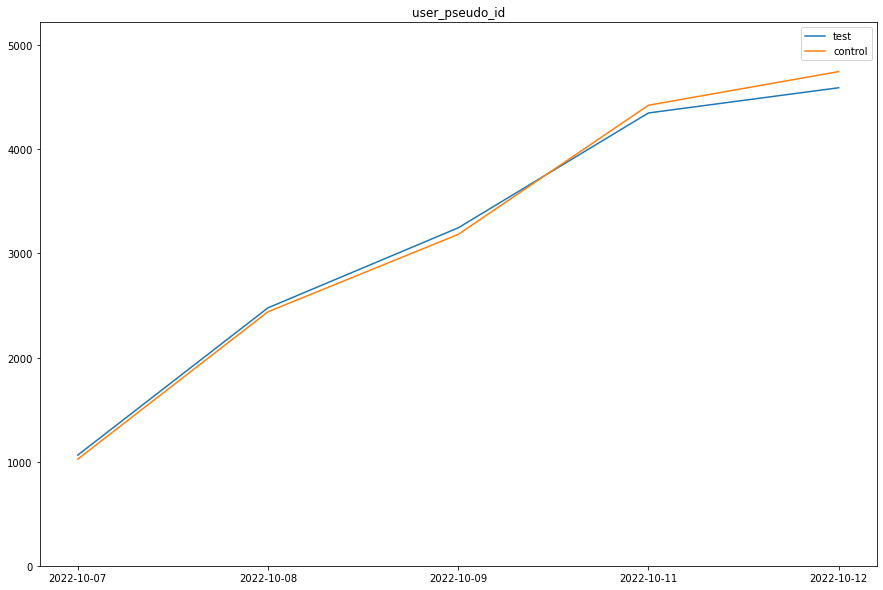

android_orders_flg.png


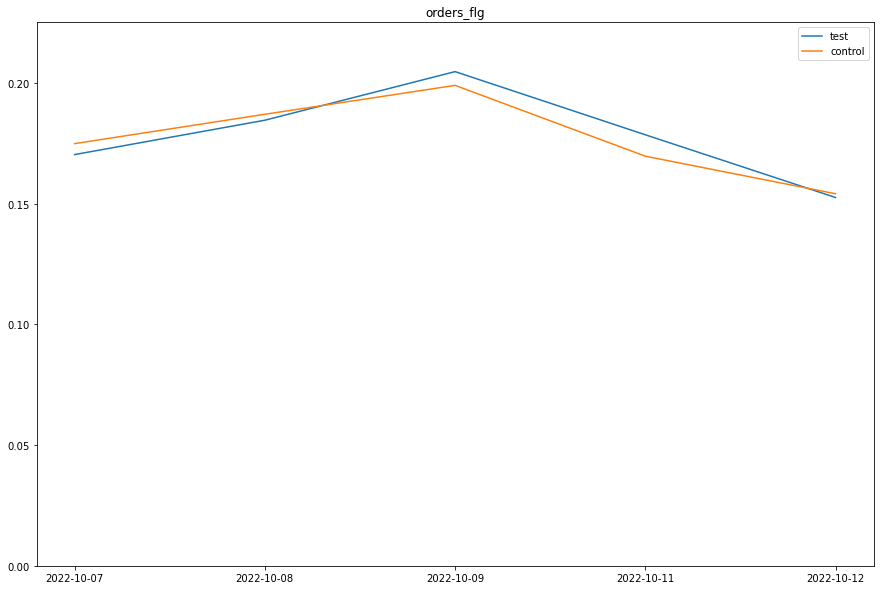

android_count_orders.png


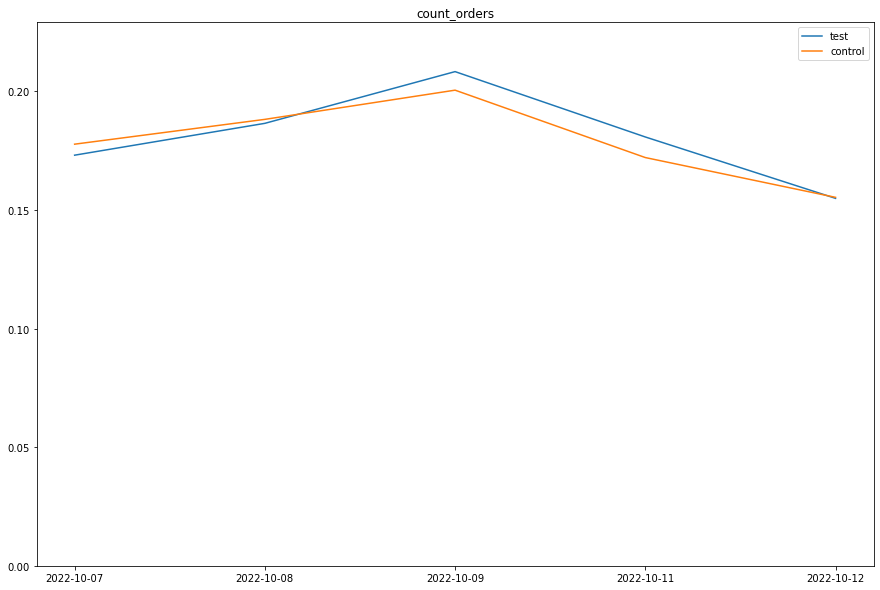

android_revenue.png


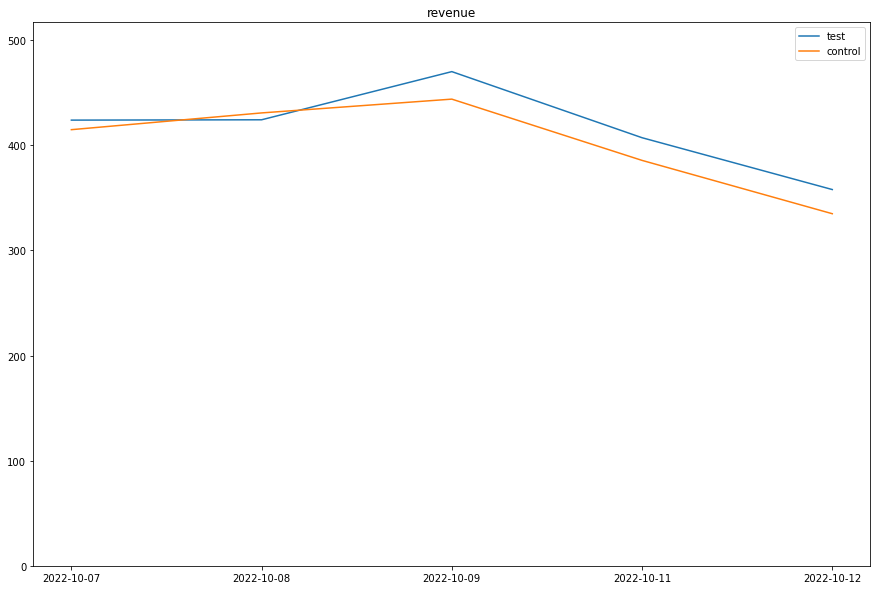

android_margin.png


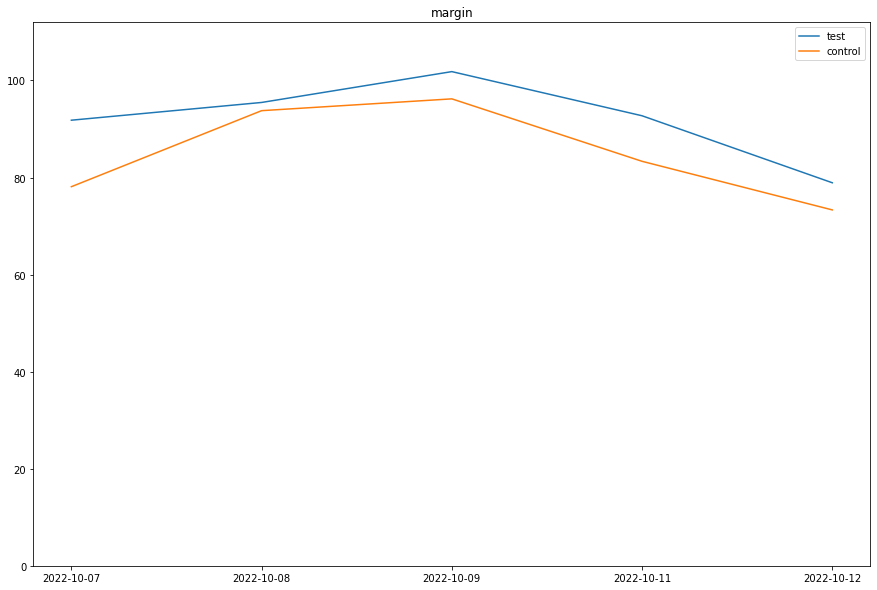

android_complete_purchase_flg.png


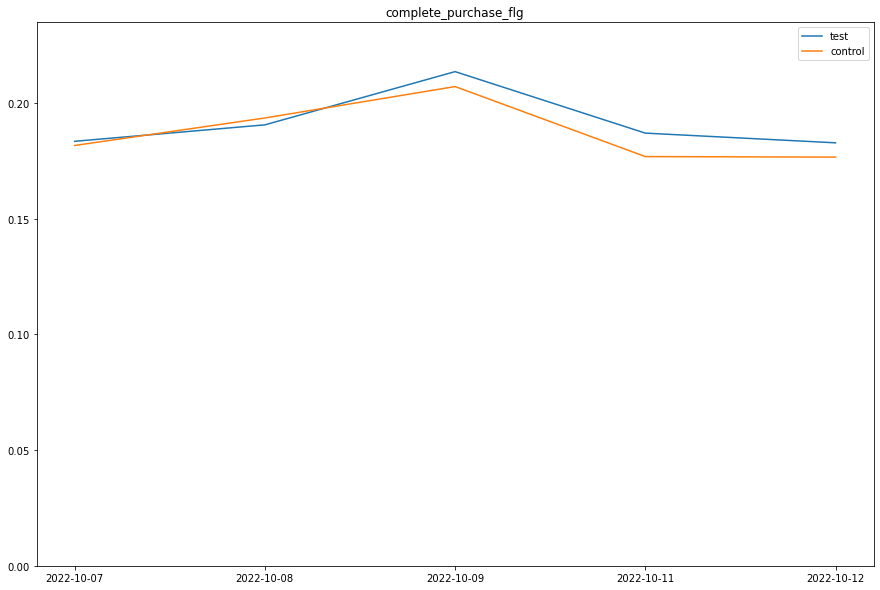

android_add_to_cart_flg.png


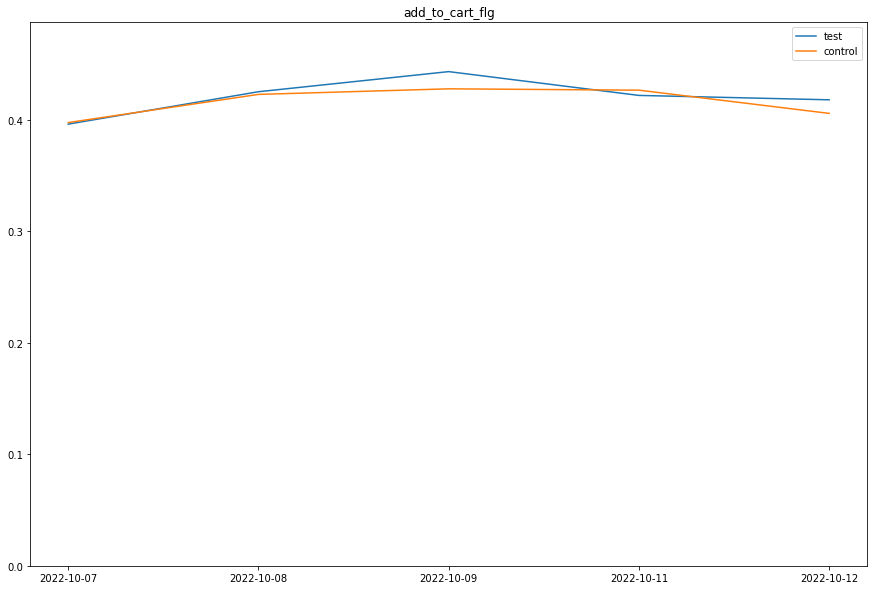

android_complete_purchase.png


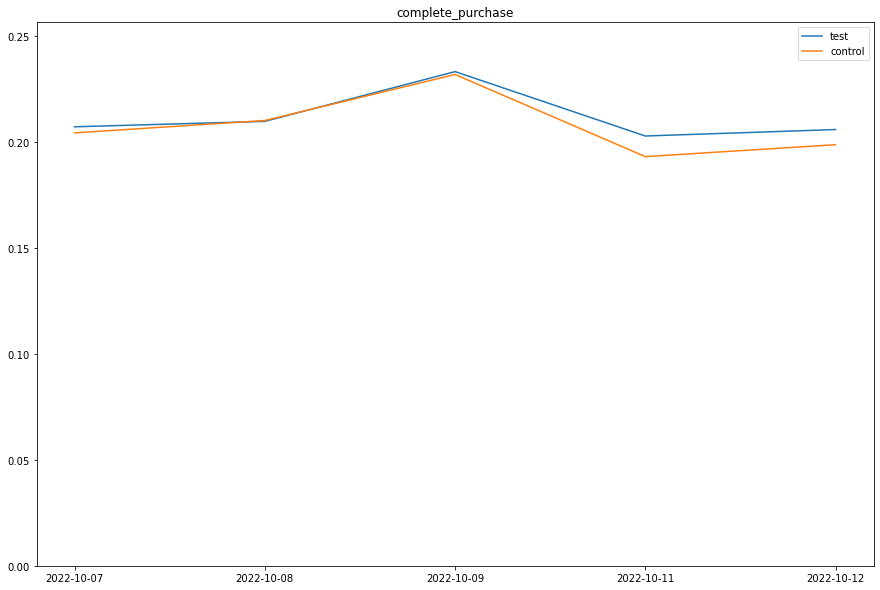

android_add_to_cart.png


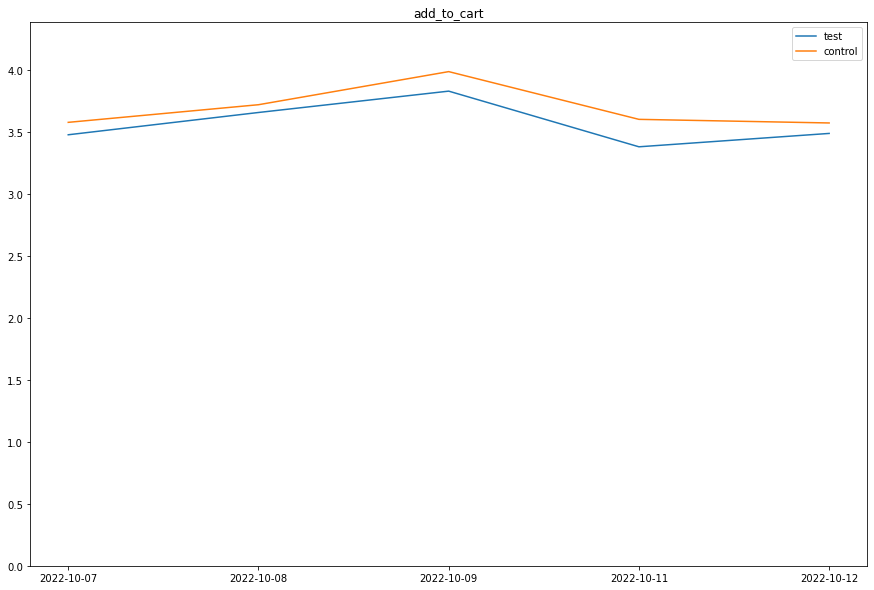

android_add_to_cart_catalog_flg.png


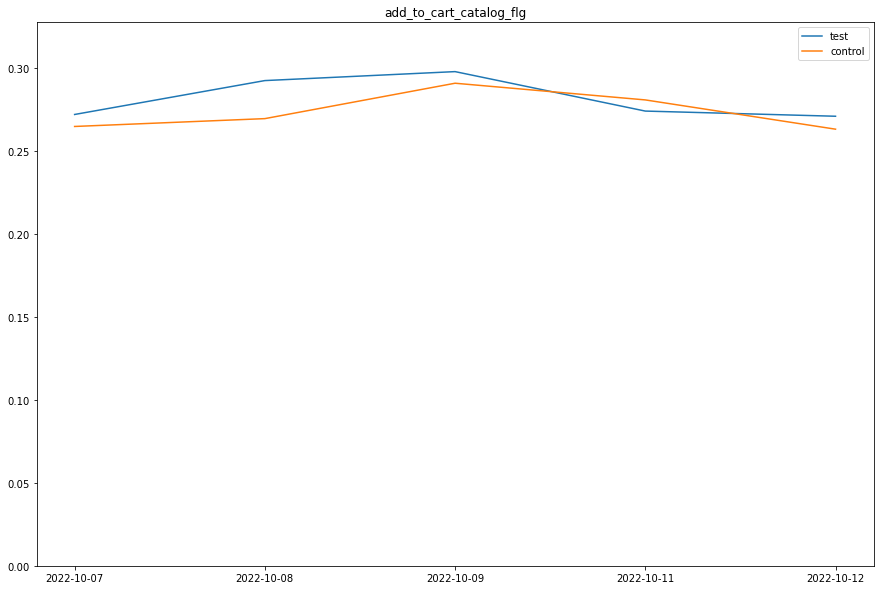

android_add_to_cart_search_flg.png


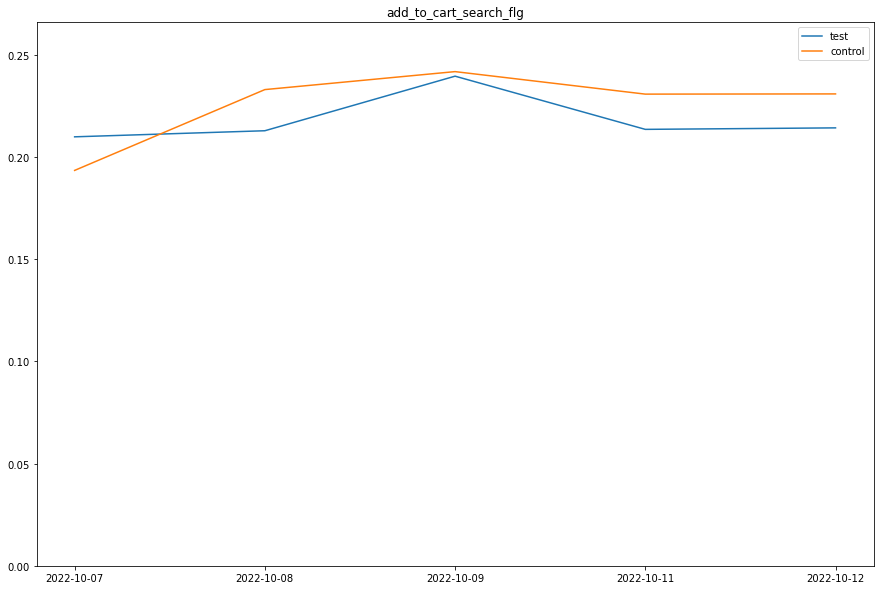

android_search_for_item_flg.png


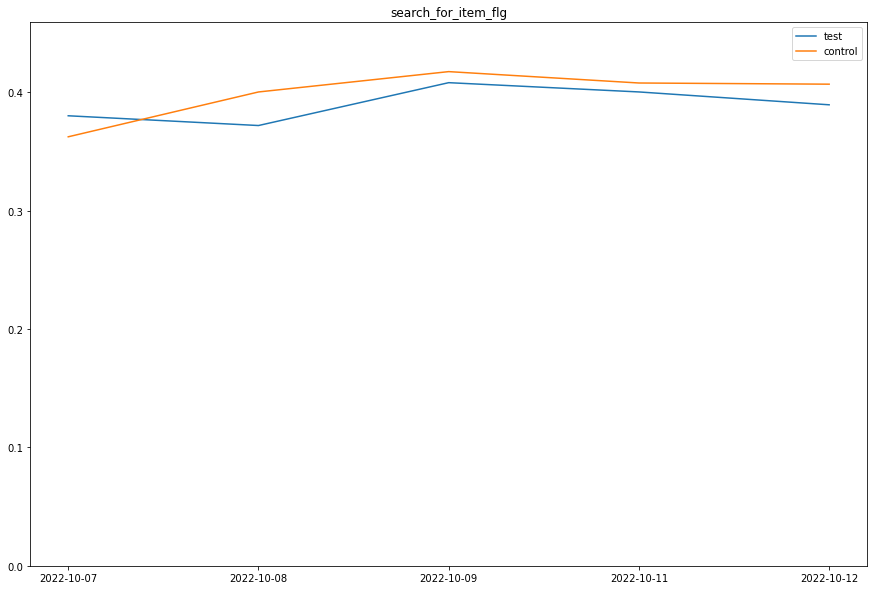

android_sorting_show_type_flg.png


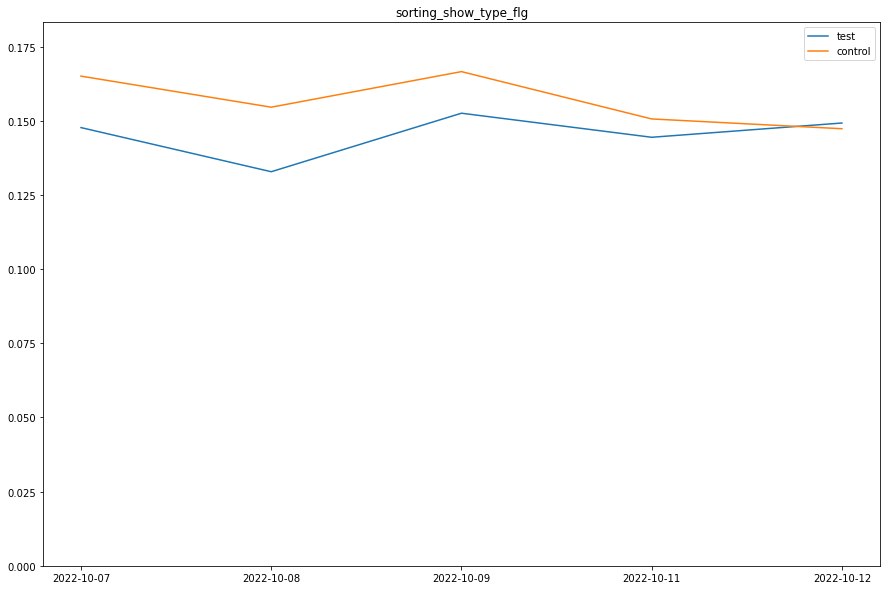

android_sorting_change_type_flg.png


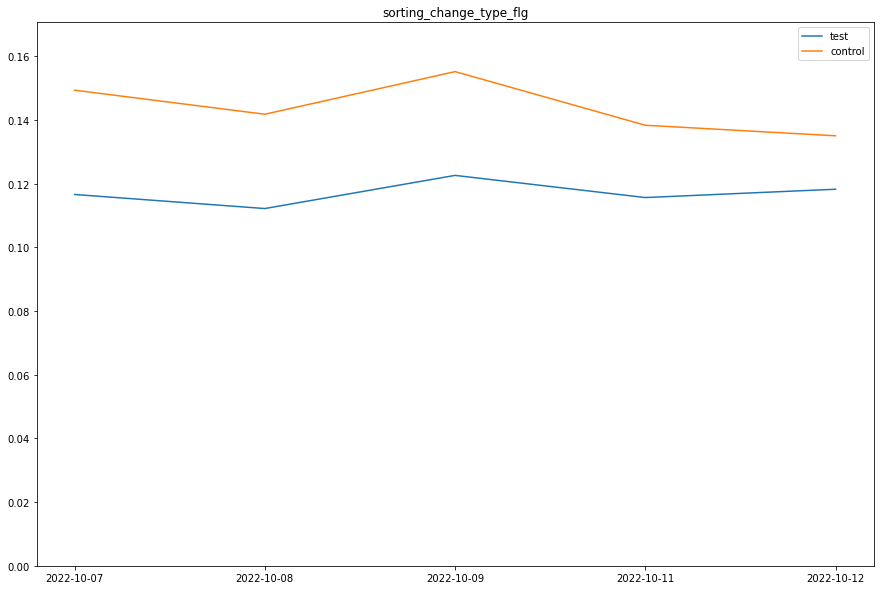

android_filter_show_flg.png


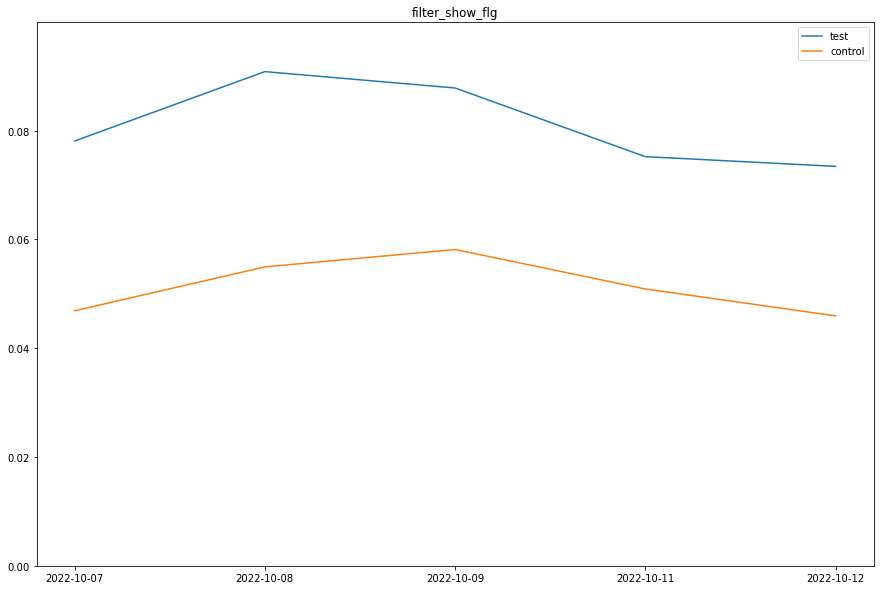

android_filter_select_flg.png


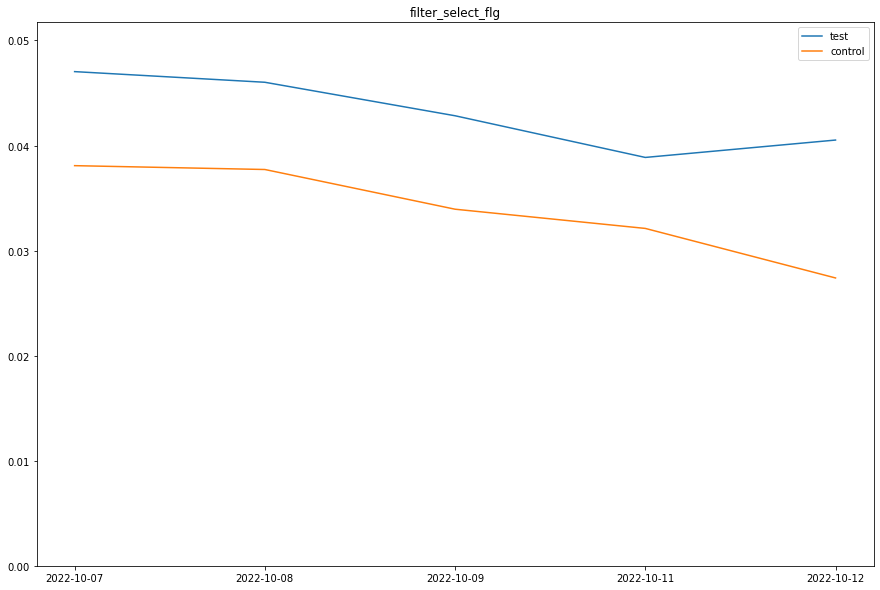

android_add_to_cart_catalog.png


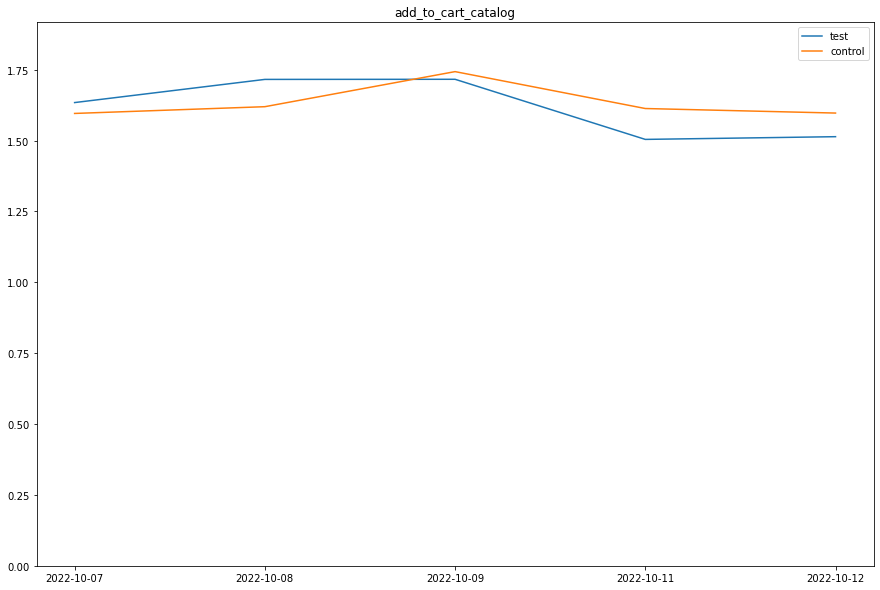

android_add_to_cart_search.png


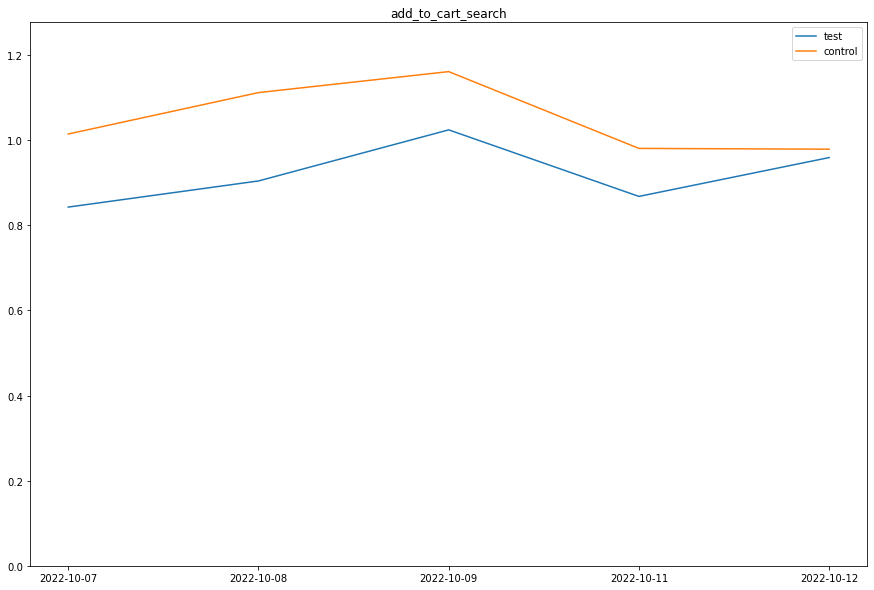

android_search_for_item.png


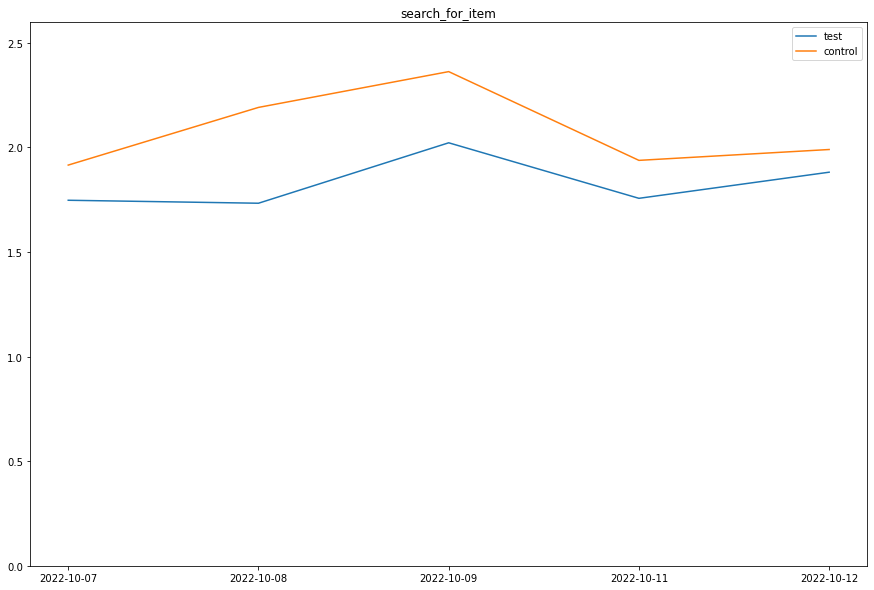

android_sorting_show_type.png


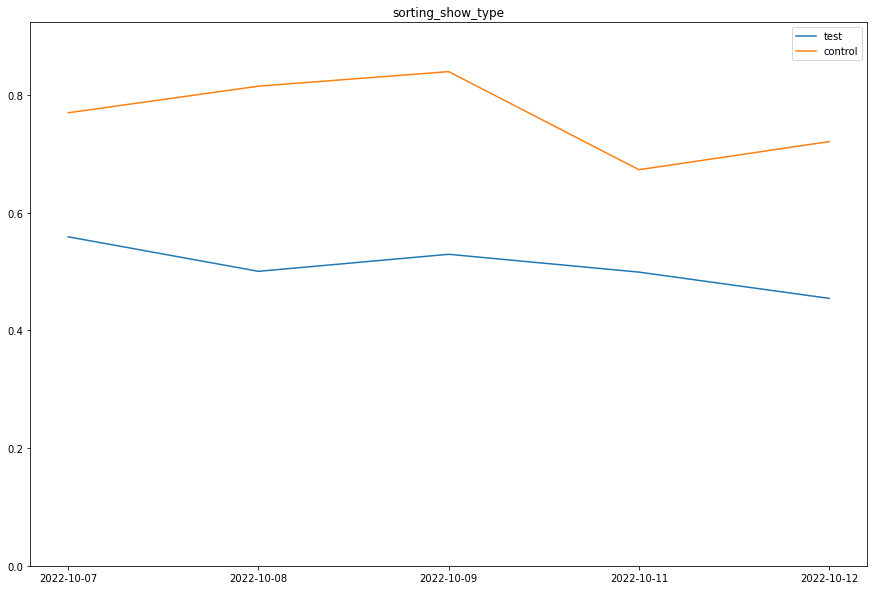

android_sorting_change_type.png


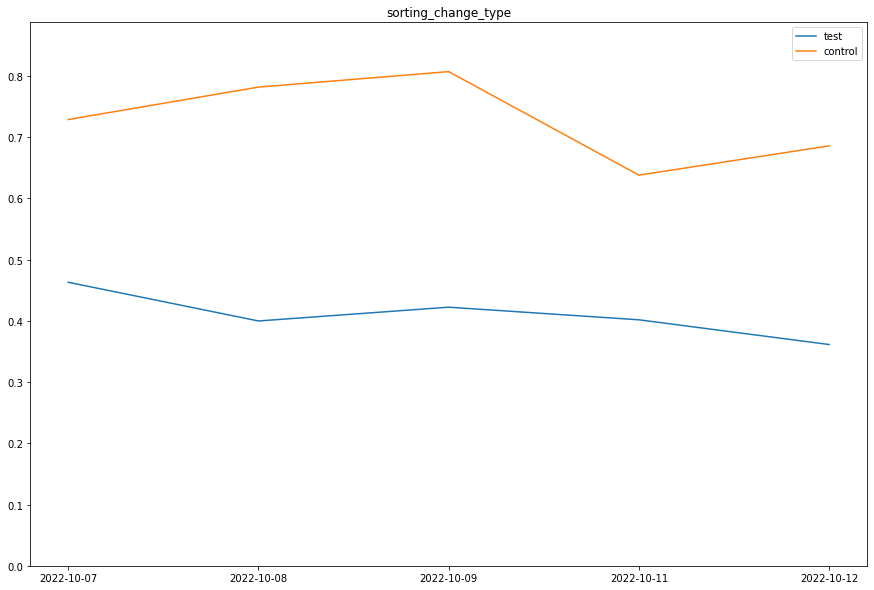

android_filter_show.png


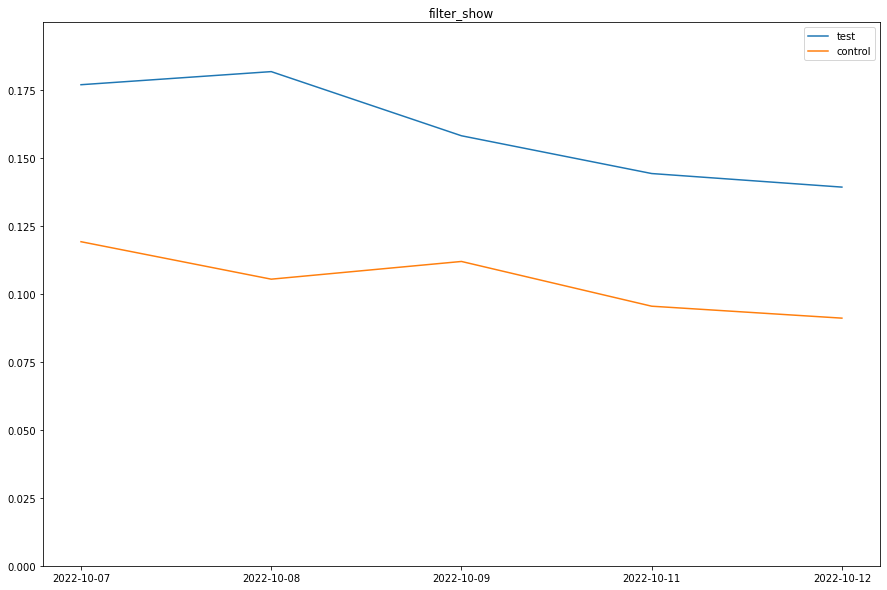

android_filter_select.png


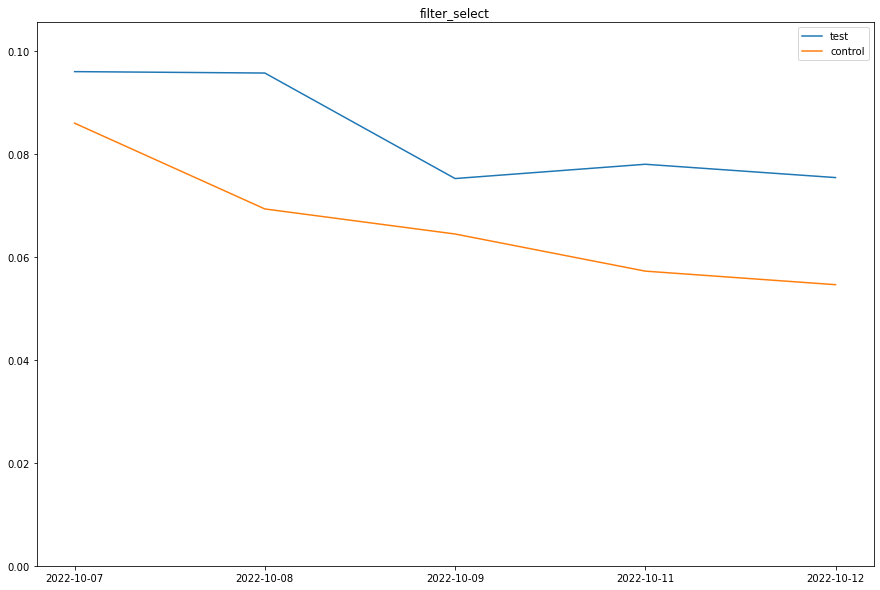

In [16]:
import numpy as np
import matplotlib.pyplot as plt


list_metrics = ['user_pseudo_id','orders_flg','count_orders','revenue','margin','complete_purchase_flg','add_to_cart_flg','complete_purchase','add_to_cart','add_to_cart_catalog_flg','add_to_cart_search_flg','search_for_item_flg','sorting_show_type_flg','sorting_change_type_flg','filter_show_flg','filter_select_flg','add_to_cart_catalog','add_to_cart_search','search_for_item','sorting_show_type','sorting_change_type','filter_show','filter_select']

for i in range(0,len(list_metrics),1):
    x = list(test_android['dt'])
    test = list(test_android[list_metrics[i]])
    control = list(control_android[list_metrics[i]])


    fig, ax = plt.subplots(figsize=(15, 10))
#     ax.figure(figsize=(15, 10))

    # Using set_dashes() to modify dashing of an existing line
    line1 = ax.plot(x, test, label='test')

    # Using plot(..., dashes=...) to set the dashing when creating a line
    line2 = ax.plot(x, control , label='control')
    plt.title(list_metrics[i])
    if np.max(control_android[list_metrics[i]]) > np.max(test_android[list_metrics[i]]): 
        ax.set_ylim(0,1.1*np.max(control_android[list_metrics[i]]))
    else:
        ax.set_ylim(0,1.1*np.max(test_android[list_metrics[i]]))
#     plt.figure(figsize=(15, 10))


    ax.legend()
    k = 'android_'+ str(list_metrics[i]) + '.png'
    print(k)
    plt.savefig(k, dpi=50)
    plt.show()

ios_user_pseudo_id.png


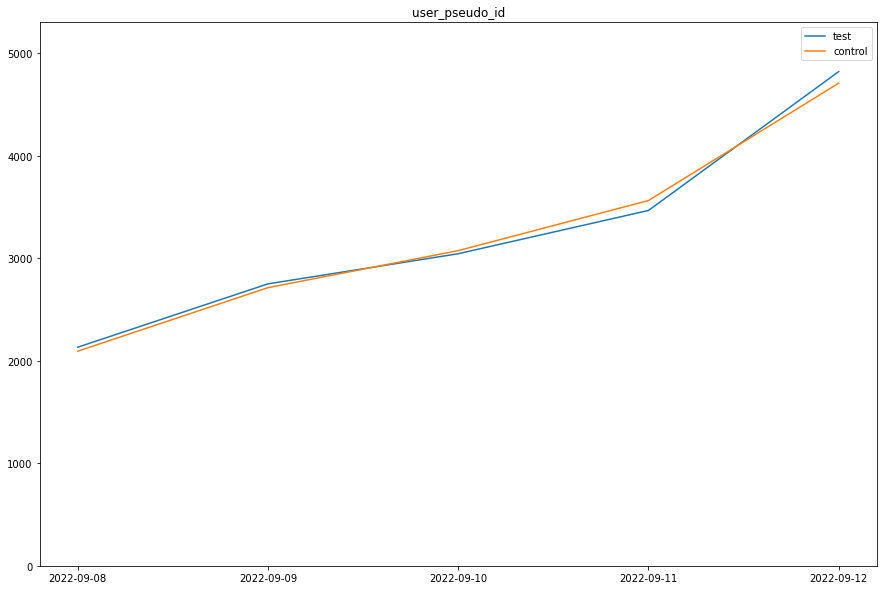

ios_orders_flg.png


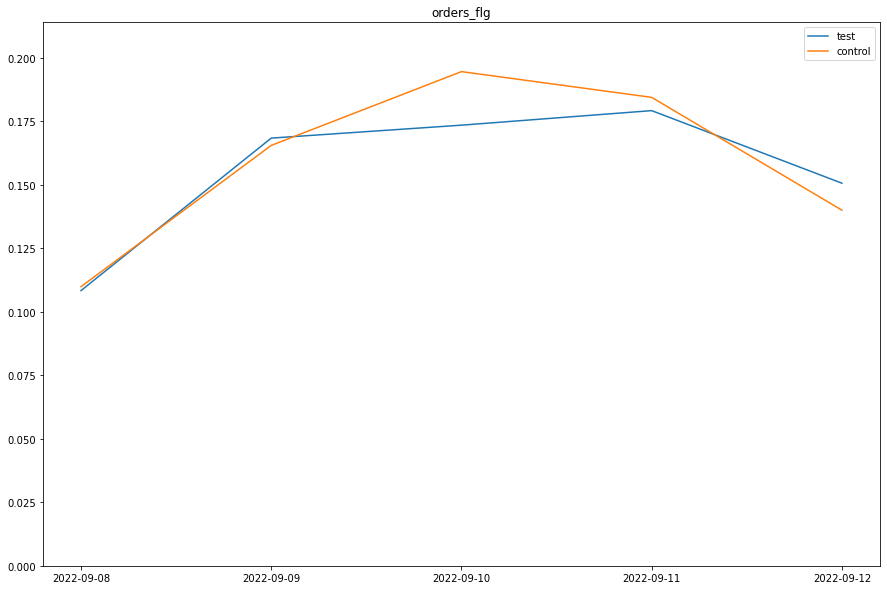

ios_count_orders.png


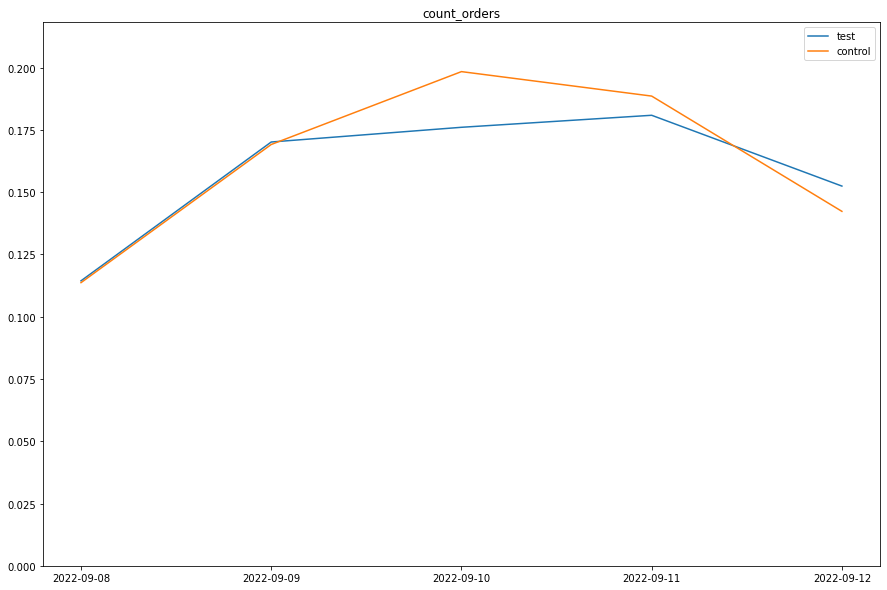

ios_revenue.png


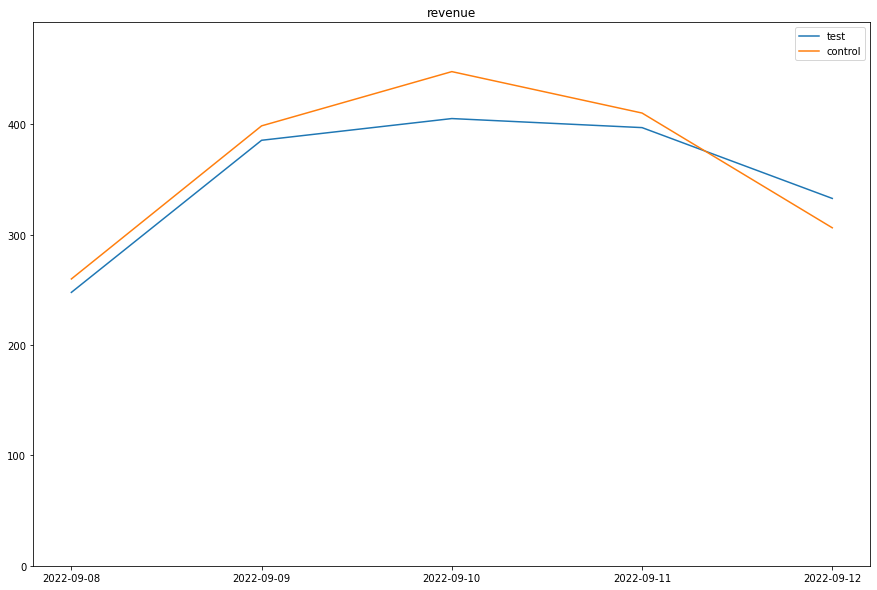

ios_margin.png


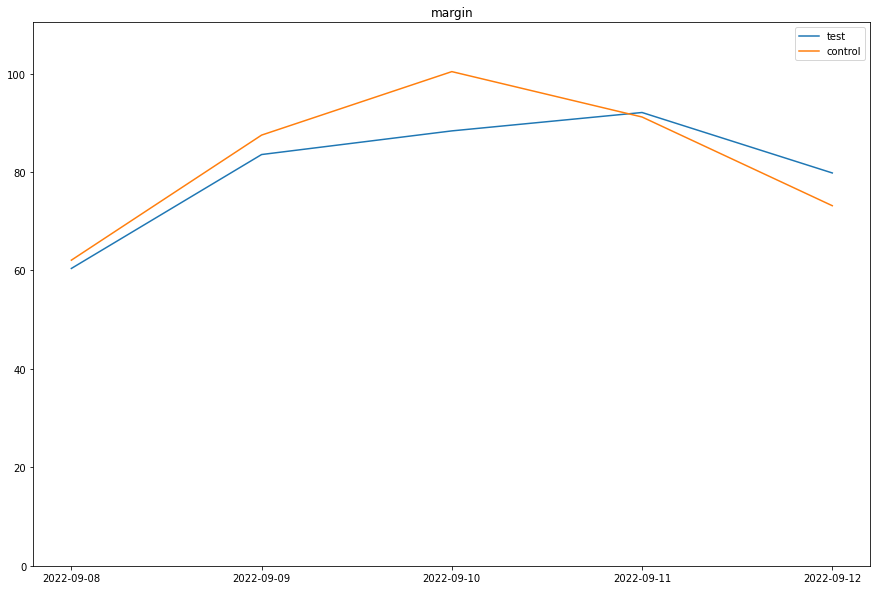

ios_complete_purchase_flg.png


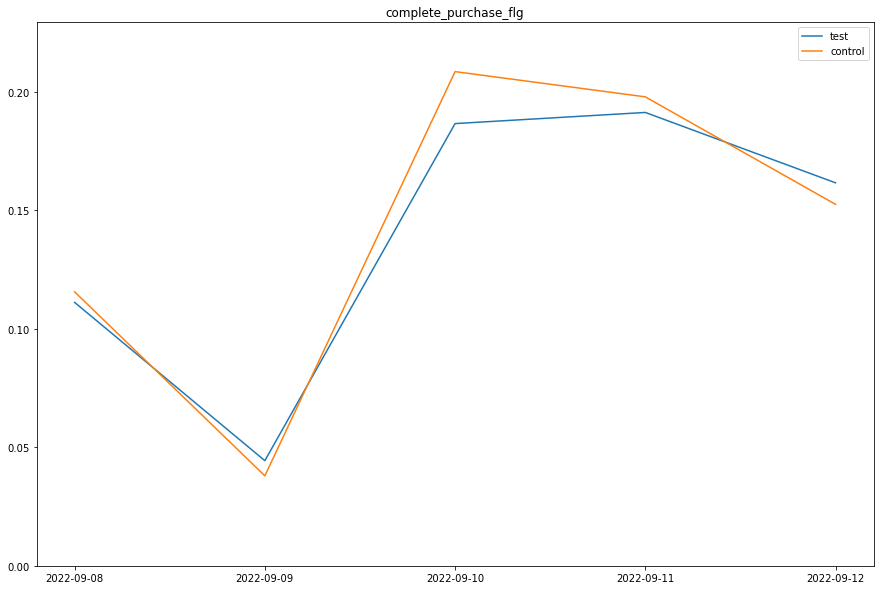

ios_add_to_cart_flg.png


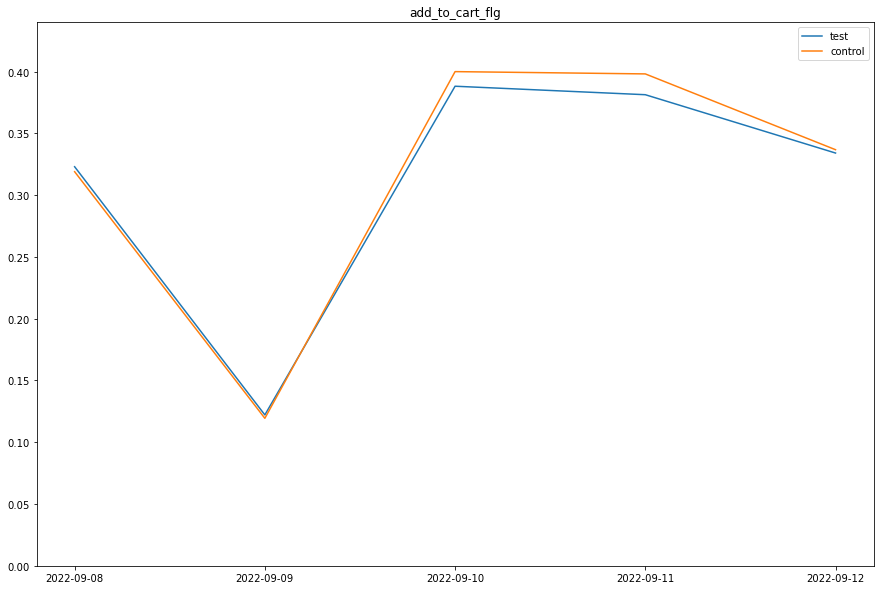

ios_complete_purchase.png


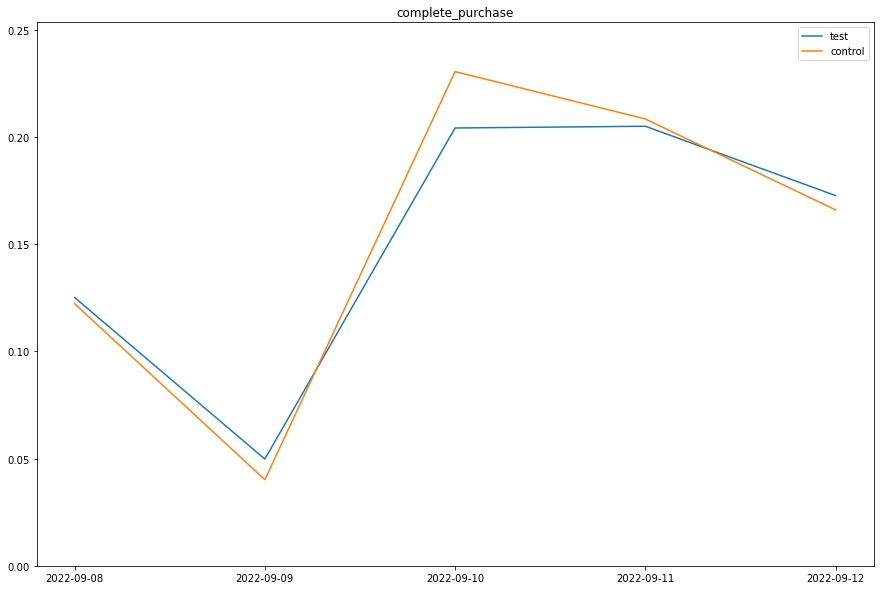

ios_add_to_cart.png


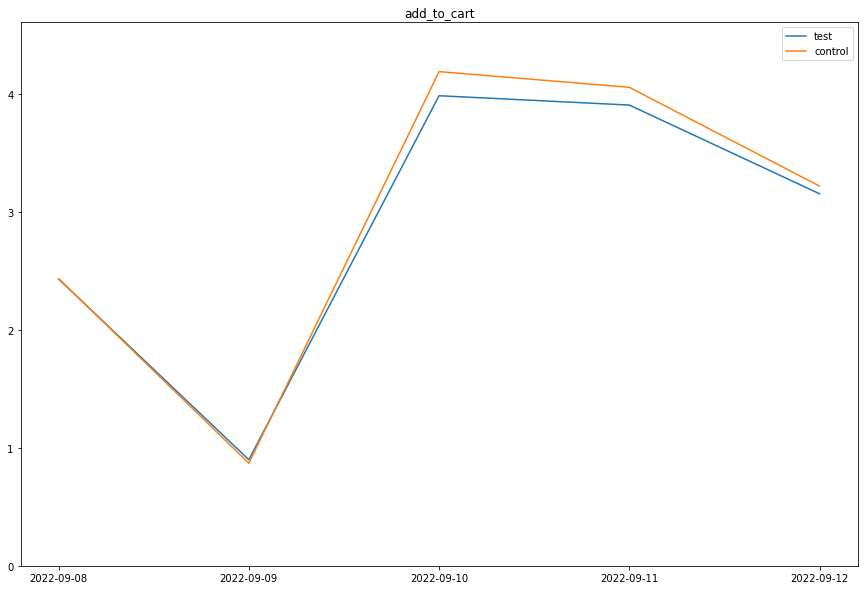

ios_add_to_cart_catalog_flg.png


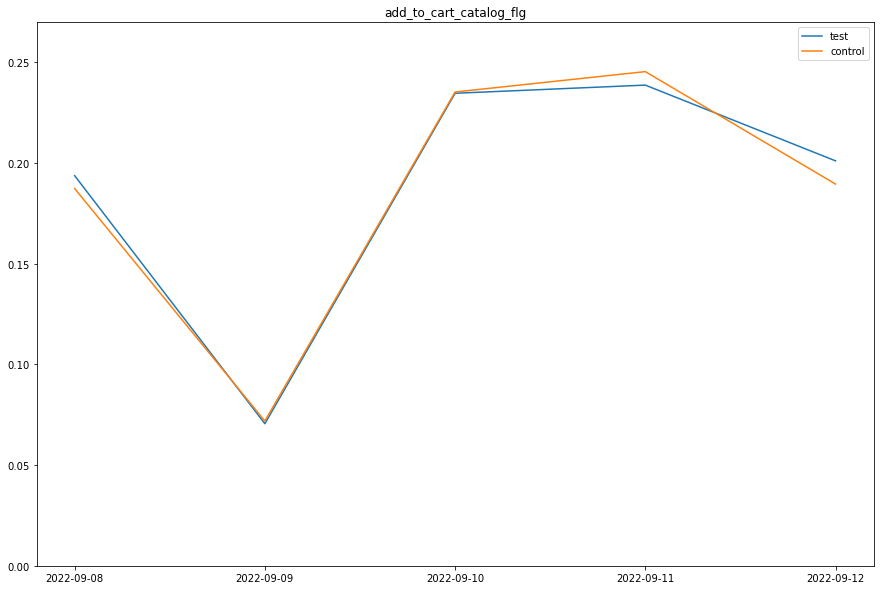

ios_add_to_cart_search_flg.png


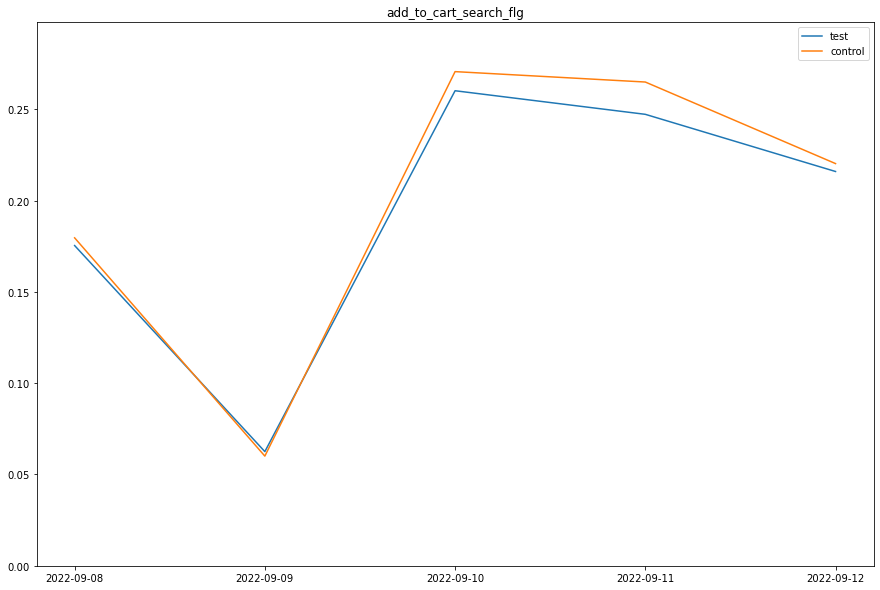

ios_search_for_item_flg.png


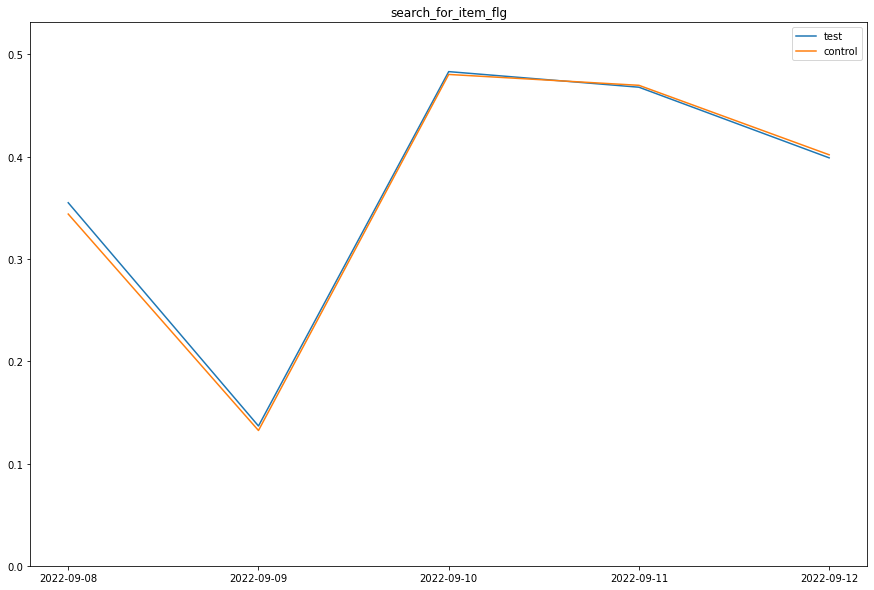

ios_sorting_show_type_flg.png


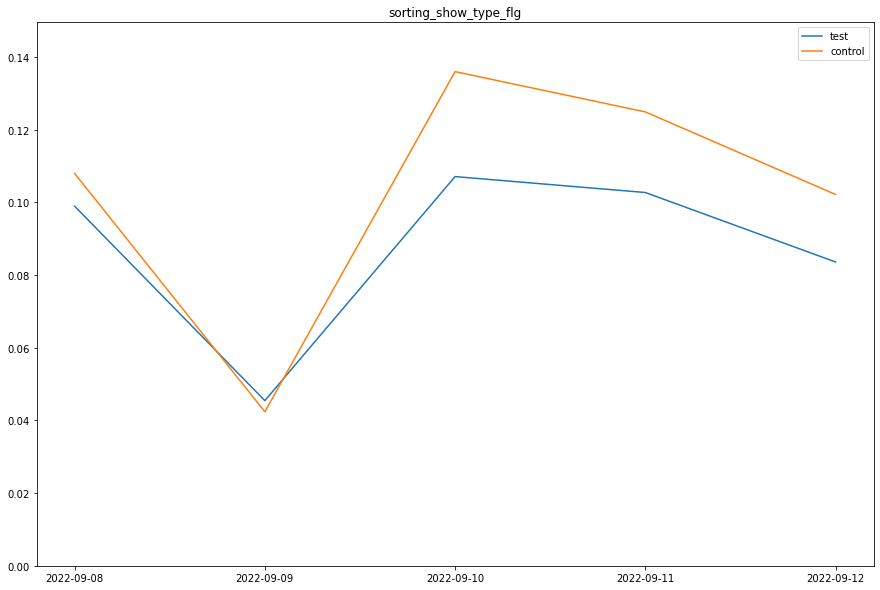

ios_sorting_change_type_flg.png


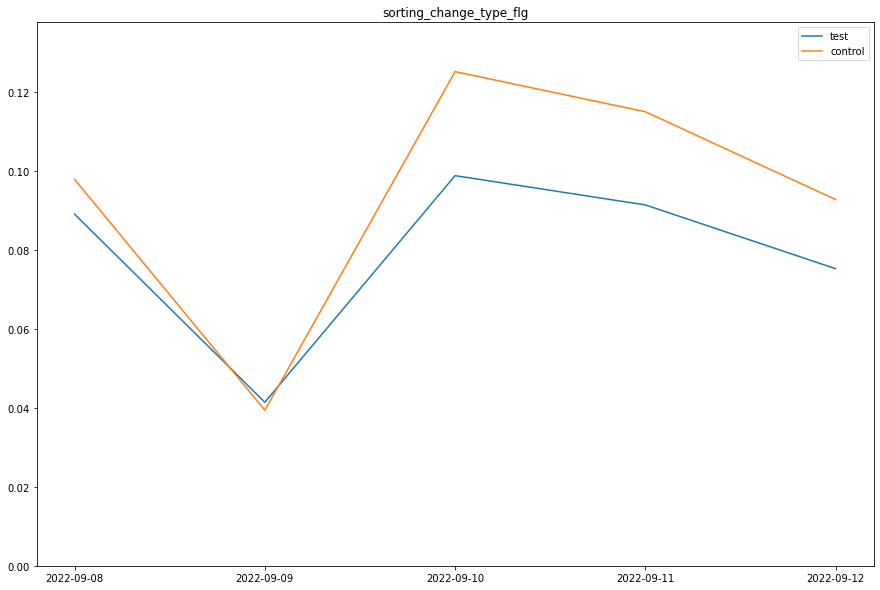

ios_filter_show_flg.png


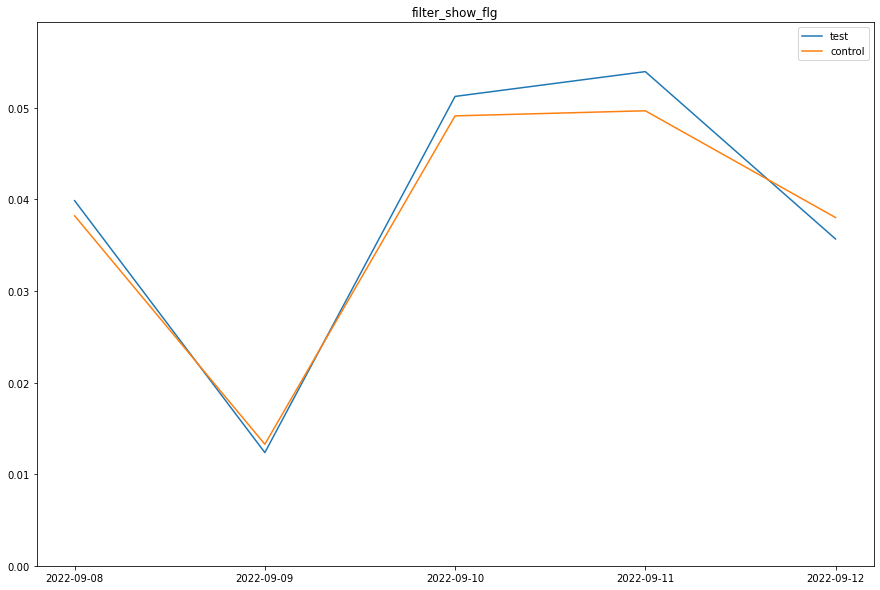

ios_filter_select_flg.png


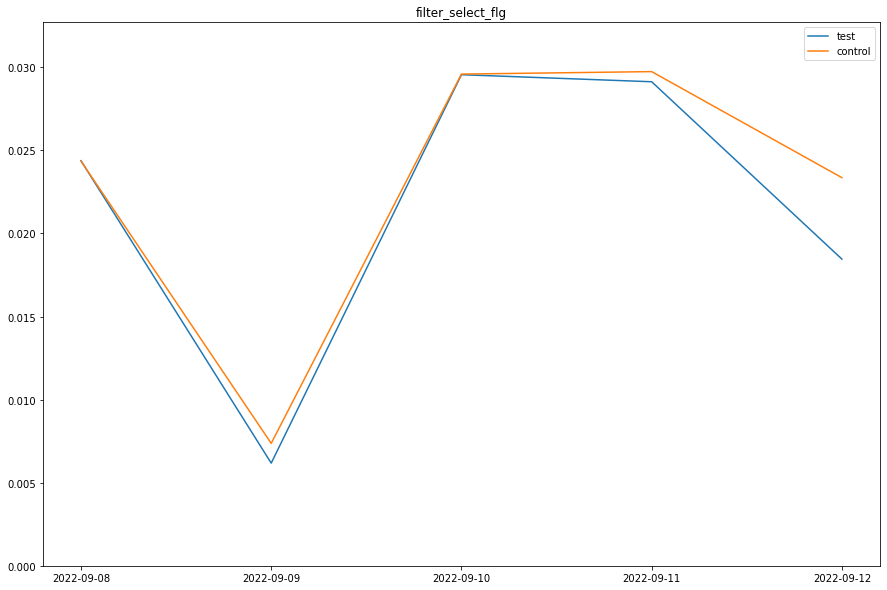

ios_add_to_cart_catalog.png


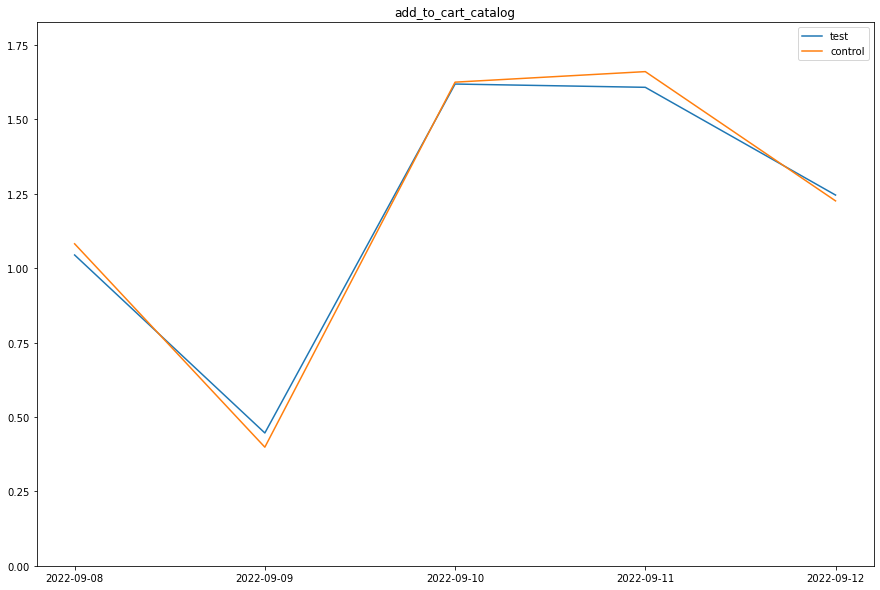

ios_add_to_cart_search.png


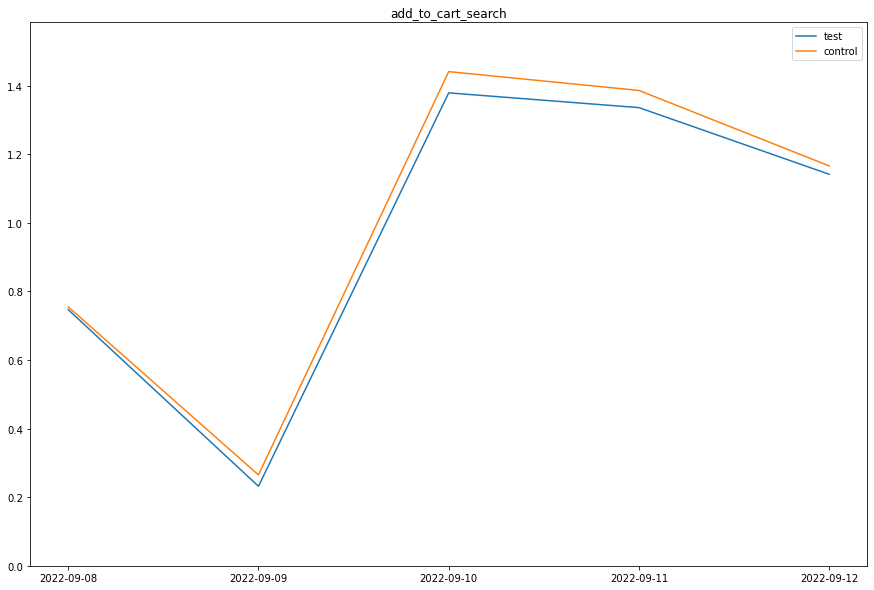

ios_search_for_item.png


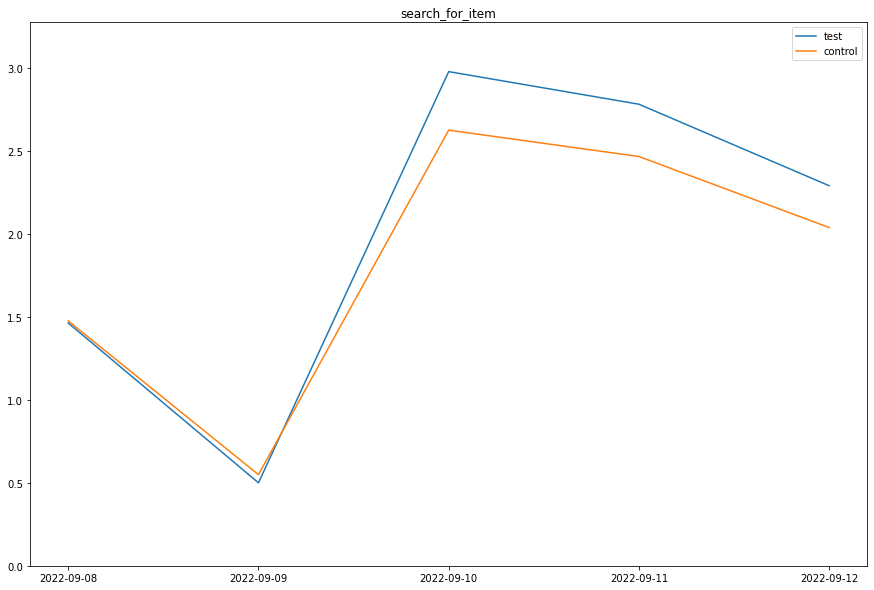

ios_sorting_show_type.png


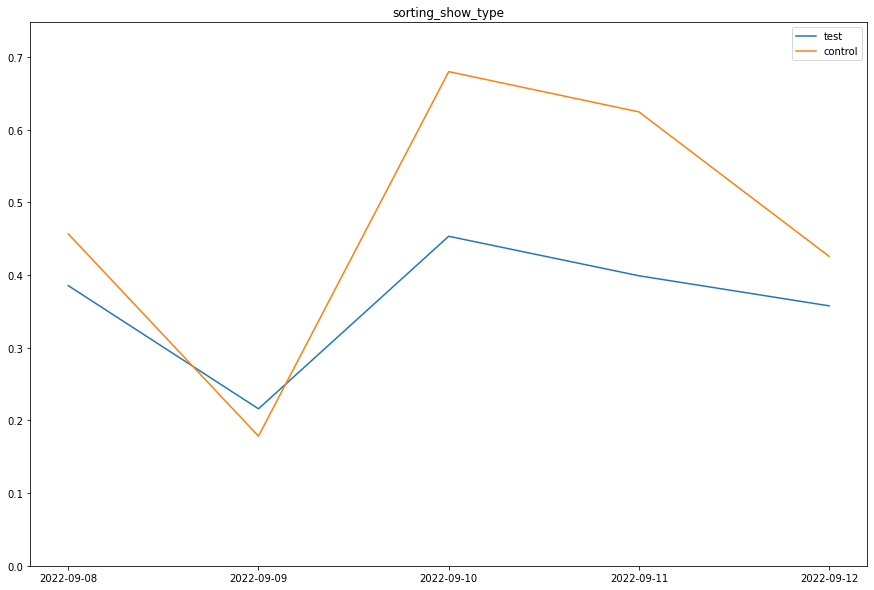

ios_sorting_change_type.png


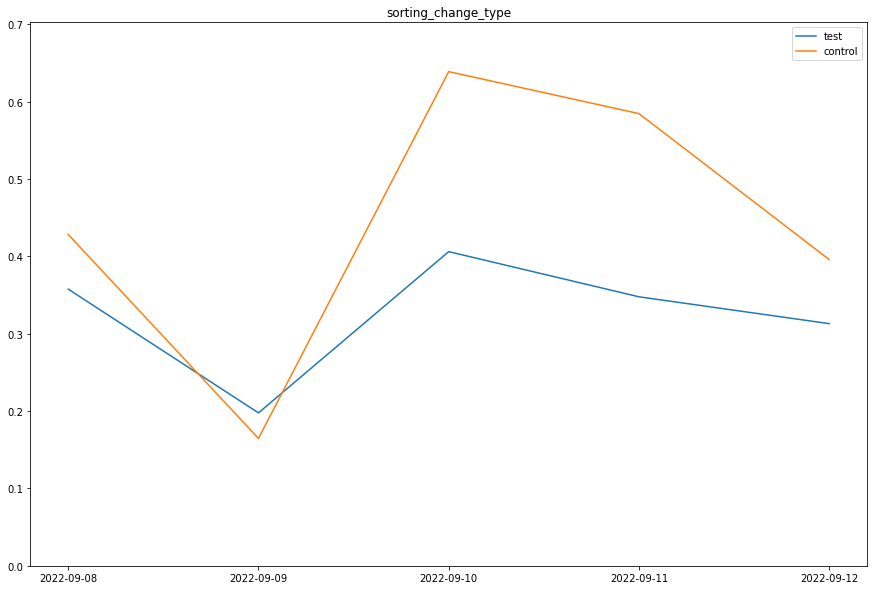

ios_filter_show.png


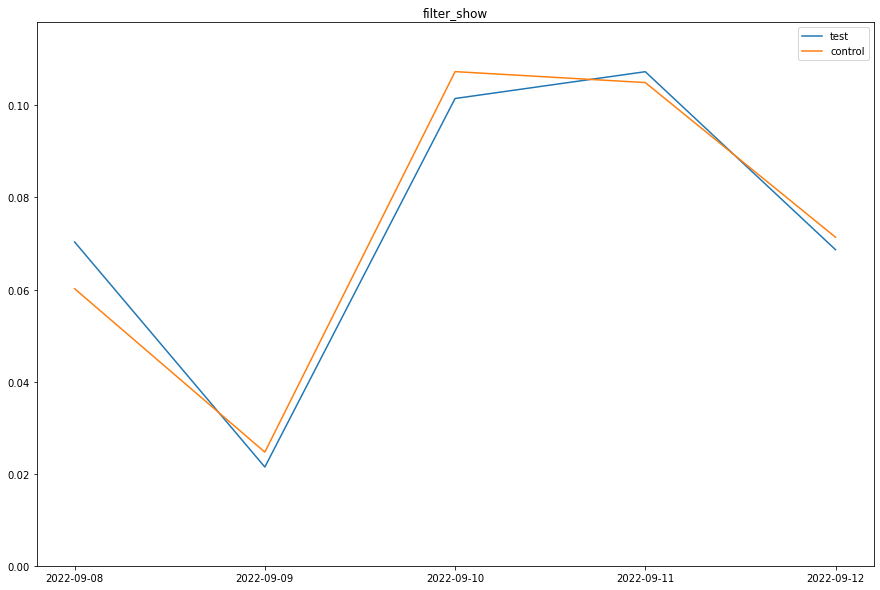

ios_filter_select.png


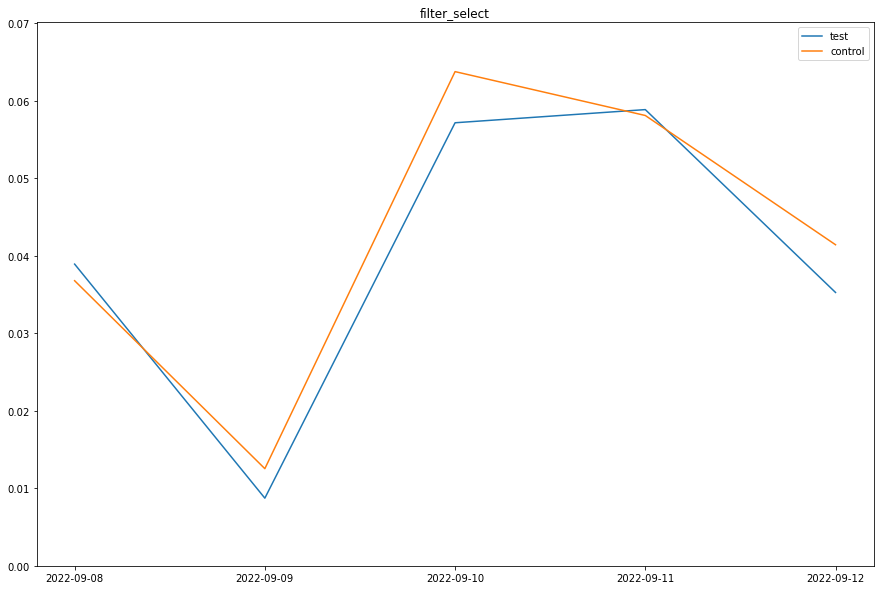

In [32]:
import numpy as np
import matplotlib.pyplot as plt


list_metrics = ['user_pseudo_id','orders_flg','count_orders','revenue','margin','complete_purchase_flg','add_to_cart_flg','complete_purchase','add_to_cart','add_to_cart_catalog_flg','add_to_cart_search_flg','search_for_item_flg','sorting_show_type_flg','sorting_change_type_flg','filter_show_flg','filter_select_flg','add_to_cart_catalog','add_to_cart_search','search_for_item','sorting_show_type','sorting_change_type','filter_show','filter_select']

for i in range(0,len(list_metrics),1):
    x = list(test_ios['dt'])
    test = list(test_ios[list_metrics[i]])
    control = list(control_ios[list_metrics[i]])


    fig, ax = plt.subplots(figsize=(15, 10))


    # Using set_dashes() to modify dashing of an existing line
    line1 = ax.plot(x, test, label='test')

    # Using plot(..., dashes=...) to set the dashing when creating a line
    line2 = ax.plot(x, control , label='control')
    plt.title(list_metrics[i])
    if np.max(control_ios[list_metrics[i]]) > np.max(test_ios[list_metrics[i]]): 
        ax.set_ylim(0,1.1*np.max(control_ios[list_metrics[i]]))
    else:
        ax.set_ylim(0,1.1*np.max(test_ios[list_metrics[i]]))

    ax.legend()
    k = 'ios_'+ str(list_metrics[i]) + '.png'
    print(k)
    plt.savefig(k, dpi=50)
    plt.show()

In [5]:

control_bakets = control_ios.groupby('bakets').mean()['revenue']
test_bakets = test_ios.groupby('bakets').mean()['revenue']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

control_bakets = control_android.groupby('bakets').mean()['revenue']
test_bakets = test_android.groupby('bakets').mean()['revenue']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

Ttest_indResult(statistic=0.7611317818699515, pvalue=0.4466600813572603)
419.8964218852316 431.8471636247128
Ttest_indResult(statistic=2.0461995219381657, pvalue=0.04085560611981212)
549.70578043808 569.3289505271814


In [7]:

control_bakets = control_ios.groupby('bakets').mean()['margin']
test_bakets = test_ios.groupby('bakets').mean()['margin']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

control_bakets = control_android.groupby('bakets').mean()['margin']
test_bakets = test_android.groupby('bakets').mean()['margin']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

Ttest_indResult(statistic=1.3462849516054354, pvalue=0.1784657353530261)
539.0229646212518 598.1937509237171
Ttest_indResult(statistic=0.3345167338652291, pvalue=0.7380483178936682)
572.3147221104173 584.3862257350959


In [8]:

control_bakets = control_ios.groupby('bakets').mean()['count_orders']
test_bakets = test_ios.groupby('bakets').mean()['count_orders']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

control_bakets = control_android.groupby('bakets').mean()['count_orders']
test_bakets = test_android.groupby('bakets').mean()['count_orders']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

Ttest_indResult(statistic=0.839579442810598, pvalue=0.4013120181131531)
0.3143348629960095 0.32295711640511043
Ttest_indResult(statistic=2.370427231268068, pvalue=0.01792539936949611)
0.3682816522086745 0.3804211028455603


In [ ]:
view_product_page	complete_purchase	add_to_cart	add_to_cart_catalog

In [15]:

control_bakets = control_ios.groupby('bakets').mean()['view_product_page']
test_bakets = test_ios.groupby('bakets').mean()['view_product_page']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

control_bakets = control_android.groupby('bakets').mean()['view_product_page']
test_bakets = test_android.groupby('bakets').mean()['view_product_page']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

Ttest_indResult(statistic=0.5384877857578648, pvalue=0.590340538123004)
3.0827102731592686 3.153650814774877
Ttest_indResult(statistic=0.36486203034974923, pvalue=0.7152789041674438)
2.705435341963053 2.7241242627860798


In [16]:

control_bakets = control_ios.groupby('bakets').mean()['complete_purchase']
test_bakets = test_ios.groupby('bakets').mean()['complete_purchase']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

control_bakets = control_android.groupby('bakets').mean()['complete_purchase']
test_bakets = test_android.groupby('bakets').mean()['complete_purchase']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

Ttest_indResult(statistic=1.5903650691599485, pvalue=0.11201681444683101)
0.2439464673228897 0.2596449459600509
Ttest_indResult(statistic=1.6303370144255978, pvalue=0.10329359037952102)
0.2828993937550739 0.29145691662159207


In [17]:

control_bakets = control_ios.groupby('bakets').mean()['add_to_cart']
test_bakets = test_ios.groupby('bakets').mean()['add_to_cart']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

control_bakets = control_android.groupby('bakets').mean()['add_to_cart']
test_bakets = test_android.groupby('bakets').mean()['add_to_cart']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

Ttest_indResult(statistic=1.0200061555059445, pvalue=0.3079318204023728)
4.761007002065048 4.936024537857448
Ttest_indResult(statistic=5.138651709247287, pvalue=3.22915989017639e-07)
4.849163528457149 5.235894026938274


In [18]:

control_bakets = control_ios.groupby('bakets').mean()['add_to_cart_catalog']
test_bakets = test_ios.groupby('bakets').mean()['add_to_cart_catalog']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

control_bakets = control_android.groupby('bakets').mean()['add_to_cart_catalog']
test_bakets = test_android.groupby('bakets').mean()['add_to_cart_catalog']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

Ttest_indResult(statistic=0.8556315293350802, pvalue=0.39237300217150706)
1.9131517051712967 1.9915345661962849
Ttest_indResult(statistic=-2.1500753601895455, pvalue=0.031749262261622835)
2.51386133838778 2.411562797862898


In [ ]:
view_product_page_flg	complete_purchase_flg	add_to_cart_flg	add_to_cart_catalog_flg	

In [19]:

control_android_users = control_android.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
test_android_users = test_android.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
control_ios_users = control_ios.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']
test_ios_users = test_ios.groupby(['group_field', 'os']).count().reset_index()['user_pseudo_id']

In [20]:

control_android_metrics = control_android.groupby(['group_field', 'os']).sum().reset_index()['view_product_page_flg']
test_android_metrics = test_android.groupby(['group_field', 'os']).sum().reset_index()['view_product_page_flg']
control_ios_metrics = control_ios.groupby(['group_field', 'os']).sum().reset_index()['view_product_page_flg']
test_ios_metrics = test_ios.groupby(['group_field', 'os']).sum().reset_index()['view_product_page_flg']

z_stat, pval = proportions_ztest([control_android_metrics[0], test_android_metrics[0]], nobs=[control_android_users[0], test_android_users[0]])
# # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print('control group', control_android_metrics[0]/control_android_users[0])
print('test group', test_android_metrics[0]/test_android_users[0])


z_stat, pval = proportions_ztest([control_ios_metrics[0], test_ios_metrics[0]], nobs=[control_ios_users[0], test_ios_users[0]])
# # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print('control group', control_ios_metrics[0]/control_ios_users[0])
print('test group', test_ios_metrics[0]/test_ios_users[0])

z statistic: 1.30
p-value: 0.195
control group 0.5034202562082832
test group 0.4975263852242744
z statistic: 0.60
p-value: 0.552
control group 0.4969946219550775
test group 0.4917022285443338


In [21]:

control_android_metrics = control_android.groupby(['group_field', 'os']).sum().reset_index()['complete_purchase_flg']
test_android_metrics = test_android.groupby(['group_field', 'os']).sum().reset_index()['complete_purchase_flg']
control_ios_metrics = control_ios.groupby(['group_field', 'os']).sum().reset_index()['complete_purchase_flg']
test_ios_metrics = test_ios.groupby(['group_field', 'os']).sum().reset_index()['complete_purchase_flg']

z_stat, pval = proportions_ztest([control_android_metrics[0], test_android_metrics[0]], nobs=[control_android_users[0], test_android_users[0]])
# # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print('control group', control_android_metrics[0]/control_android_users[0])
print('test group', test_android_metrics[0]/test_android_users[0])


z_stat, pval = proportions_ztest([control_ios_metrics[0], test_ios_metrics[0]], nobs=[control_ios_users[0], test_ios_users[0]])
# # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print('control group', control_ios_metrics[0]/control_ios_users[0])
print('test group', test_ios_metrics[0]/test_ios_users[0])

z statistic: 2.14
p-value: 0.033
control group 0.24903610961402928
test group 0.24068271767810026
z statistic: 1.49
p-value: 0.137
control group 0.22334704207529263
test group 0.21242294926505453


In [22]:

control_android_metrics = control_android.groupby(['group_field', 'os']).sum().reset_index()['add_to_cart_flg']
test_android_metrics = test_android.groupby(['group_field', 'os']).sum().reset_index()['add_to_cart_flg']
control_ios_metrics = control_ios.groupby(['group_field', 'os']).sum().reset_index()['add_to_cart_flg']
test_ios_metrics = test_ios.groupby(['group_field', 'os']).sum().reset_index()['add_to_cart_flg']

z_stat, pval = proportions_ztest([control_android_metrics[0], test_android_metrics[0]], nobs=[control_android_users[0], test_android_users[0]])
# # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print('control group', control_android_metrics[0]/control_android_users[0])
print('test group', test_android_metrics[0]/test_android_users[0])


z_stat, pval = proportions_ztest([control_ios_metrics[0], test_ios_metrics[0]], nobs=[control_ios_users[0], test_ios_users[0]])
# # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print('control group', control_ios_metrics[0]/control_ios_users[0])
print('test group', test_ios_metrics[0]/test_ios_users[0])

z statistic: 3.37
p-value: 0.001
control group 0.49405082708013764
test group 0.4787269129287599
z statistic: 0.81
p-value: 0.418
control group 0.44542866181588103
test group 0.4382803856488067


In [23]:

control_android_metrics = control_android.groupby(['group_field', 'os']).sum().reset_index()['add_to_cart_catalog_flg']
test_android_metrics = test_android.groupby(['group_field', 'os']).sum().reset_index()['add_to_cart_catalog_flg']
control_ios_metrics = control_ios.groupby(['group_field', 'os']).sum().reset_index()['add_to_cart_catalog_flg']
test_ios_metrics = test_ios.groupby(['group_field', 'os']).sum().reset_index()['add_to_cart_catalog_flg']

z_stat, pval = proportions_ztest([control_android_metrics[0], test_android_metrics[0]], nobs=[control_android_users[0], test_android_users[0]])
# # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print('control group', control_android_metrics[0]/control_android_users[0])
print('test group', test_android_metrics[0]/test_android_users[0])


z_stat, pval = proportions_ztest([control_ios_metrics[0], test_ios_metrics[0]], nobs=[control_ios_users[0], test_ios_users[0]])
# # (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint([df['categories_selection_error'][0], df['categories_selection_error'][1]], nobs=[df['user_pseudo_id'][0], df['user_pseudo_id'][1]], alpha=0.05)
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print('control group', control_ios_metrics[0]/control_ios_users[0])
print('test group', test_ios_metrics[0]/test_ios_users[0])

z statistic: -0.45
p-value: 0.653
control group 0.34617138592927327
test group 0.34812005277044855
z statistic: -0.13
p-value: 0.896
control group 0.2768111357165454
test group 0.2778568041725936


In [24]:
# bq-results-20220912-122956-1662985816369

In [68]:
df = pd.read_csv('bq-results-20220912-180329-1663005853766.csv')
df

,test,group_field,os,dt,user_pseudo_id,count_orders,orders_flg,revenue,margin,view_product_page_flg,...,add_to_cart_search_flg,sorting_show_type_flg,sorting_change_type_flg,filter_show_flg,filter_select_flg,add_to_cart_search,sorting_show_type,sorting_change_type,filter_show,filter_select
0,142,0,iOS,2022-09-09,4176,0.130029,0.127155,1378.506930,293.164248,0.284722,...,0.157807,0.100814,0.095067,0.033046,0.018678,0.848420,0.507423,0.477969,0.067768,0.040709
1,142,0,iOS,2022-09-11,6322,0.028314,0.027365,226.161607,45.989307,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,142,0,iOS,2022-09-08,2094,0.237345,0.232092,2303.410162,474.296036,0.339542,...,0.179561,0.107927,0.097899,0.038204,0.024355,0.755014,0.456543,0.428367,0.060172,0.036772
3,142,0,iOS,2022-09-10,6322,0.114204,0.111674,852.120712,187.938194,0.273331,...,0.160234,0.080671,0.074818,0.027997,0.016292,0.827903,0.392281,0.368080,0.063746,0.037014
4,142,1,iOS,2022-09-09,4254,0.131876,0.130701,1138.413674,242.176142,0.286554,...,0.164551,0.093559,0.086507,0.036671,0.023272,0.831923,0.417960,0.370945,0.072638,0.043253
5,142,1,iOS,2022-09-11,6327,0.027343,0.027185,147.585325,31.715232,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,142,1,iOS,2022-09-08,2133,0.250352,0.245663,2163.520066,471.065420,0.347398,...,0.175340,0.098922,0.089076,0.039850,0.024379,0.746835,0.385373,0.357712,0.070323,0.038912
7,142,1,iOS,2022-09-10,6327,0.100522,0.099257,761.299774,161.486836,0.269480,...,0.150940,0.070017,0.064486,0.030504,0.017386,0.786155,0.299668,0.270902,0.060060,0.033665
8,141,1,Android,2022-09-09,16549,0.158862,0.156565,1342.811082,269.405419,0.308176,...,0.108224,0.109976,0.091546,0.054505,0.027917,0.381231,0.356698,0.282494,0.111245,0.057224
9,141,1,Android,2022-09-11,24256,0.042051,0.041309,240.488423,57.131248,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [69]:

df = df.sort_values(by=['dt'])
df3_android = df[df['os'] == 'Android']
df3_ios = df[df['os'] == 'iOS']
control_android = df3_android[df3_android['group_field'] == 0]
test_android = df3_android[df3_android['group_field'] == 1]
control_ios = df3_ios[df3_ios['group_field'] == 0]
test_ios = df3_ios[df3_ios['group_field'] == 1]

control_android = control_android[control_android['dt'] < '2022-09-11']
test_android = test_android[test_android['dt'] < '2022-09-11']
control_ios = control_ios[control_ios['dt'] < '2022-09-11']
test_ios = test_ios[test_ios['dt'] < '2022-09-11']

In [70]:
test_ios

,test,group_field,os,dt,user_pseudo_id,count_orders,orders_flg,revenue,margin,view_product_page_flg,...,add_to_cart_search_flg,sorting_show_type_flg,sorting_change_type_flg,filter_show_flg,filter_select_flg,add_to_cart_search,sorting_show_type,sorting_change_type,filter_show,filter_select
6,142,1,iOS,2022-09-08,2133,0.250352,0.245663,2163.520066,471.065420,0.347398,...,0.175340,0.098922,0.089076,0.039850,0.024379,0.746835,0.385373,0.357712,0.070323,0.038912
4,142,1,iOS,2022-09-09,4254,0.131876,0.130701,1138.413674,242.176142,0.286554,...,0.164551,0.093559,0.086507,0.036671,0.023272,0.831923,0.417960,0.370945,0.072638,0.043253
7,142,1,iOS,2022-09-10,6327,0.100522,0.099257,761.299774,161.486836,0.269480,...,0.150940,0.070017,0.064486,0.030504,0.017386,0.786155,0.299668,0.270902,0.060060,0.033665


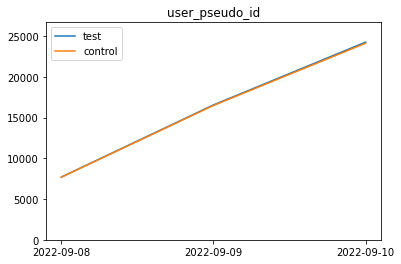

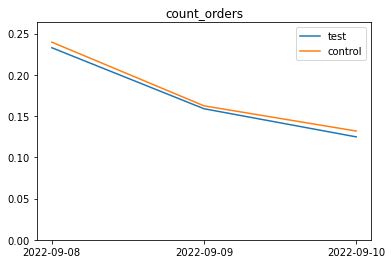

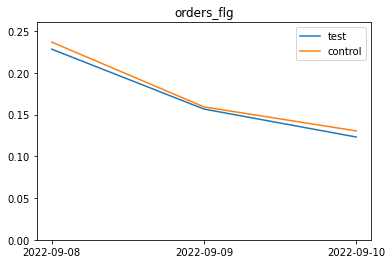

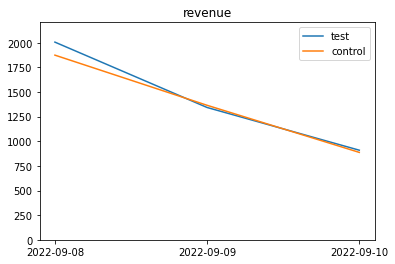

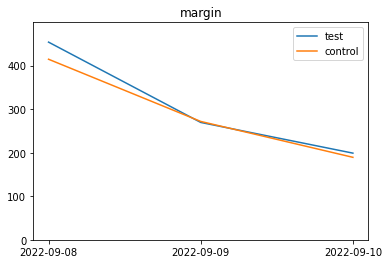

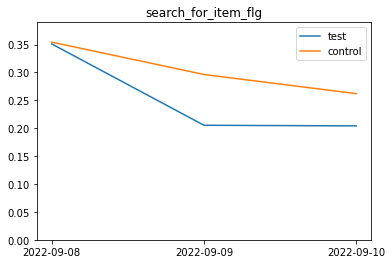

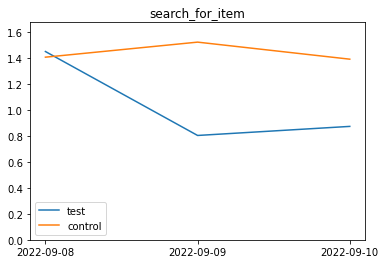

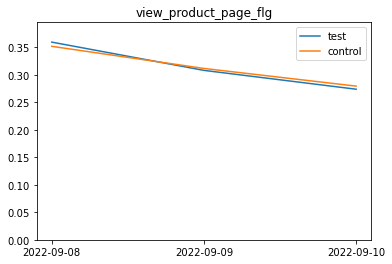

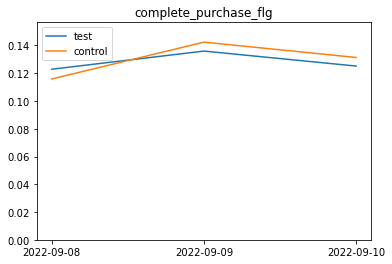

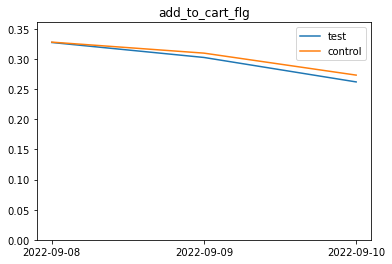

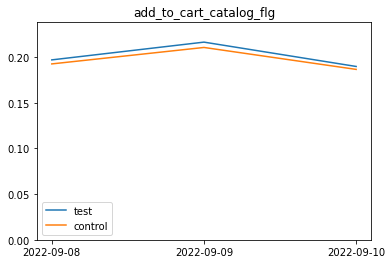

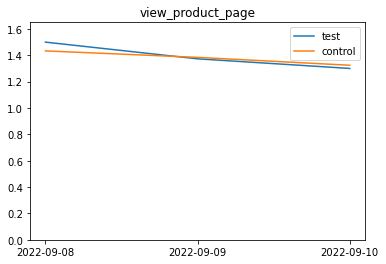

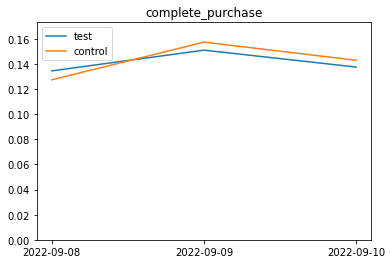

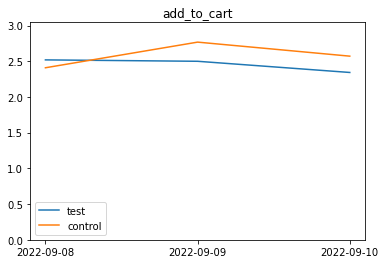

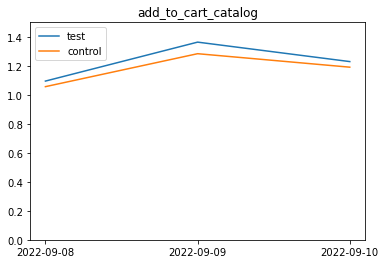

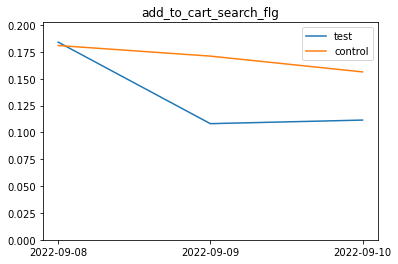

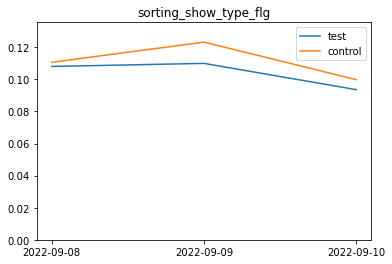

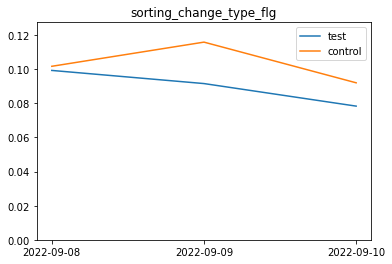

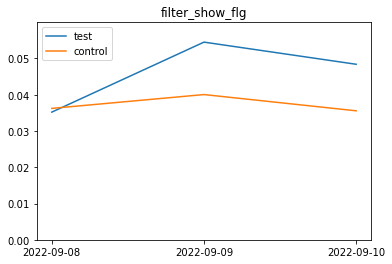

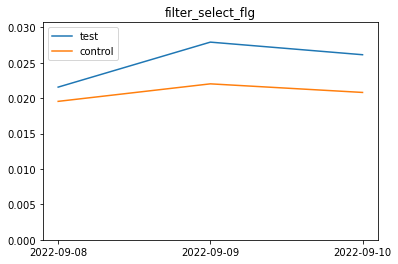

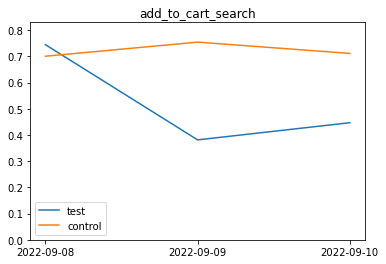

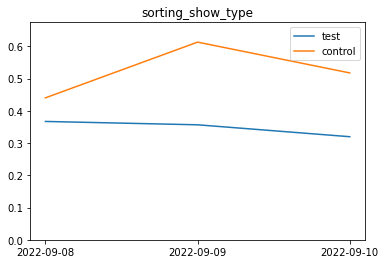

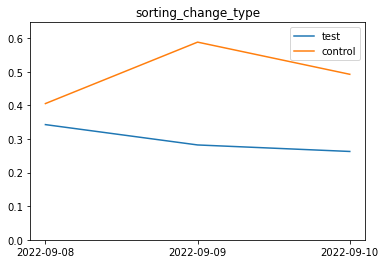

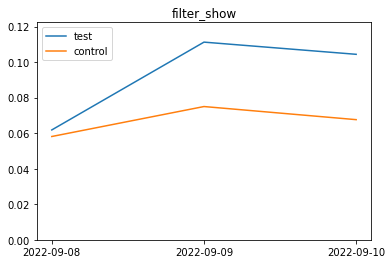

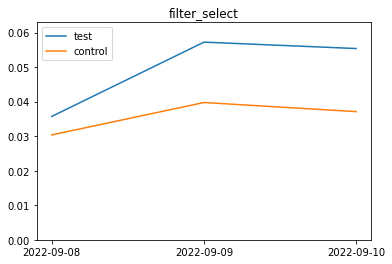

In [71]:
import numpy as np
import matplotlib.pyplot as plt


list_metrics = ['user_pseudo_id', 'count_orders', 'orders_flg','revenue', 'margin', 'search_for_item_flg', 'search_for_item', 'view_product_page_flg', 'complete_purchase_flg', 'add_to_cart_flg', 'add_to_cart_catalog_flg', 'view_product_page', 'complete_purchase', 'add_to_cart', 'add_to_cart_catalog', 'add_to_cart_search_flg','sorting_show_type_flg','sorting_change_type_flg','filter_show_flg','filter_select_flg','add_to_cart_search','sorting_show_type','sorting_change_type','filter_show','filter_select']

for i in range(0,len(list_metrics),1):
    x = list(test_android['dt'])
    test = list(test_android[list_metrics[i]])
    control = list(control_android[list_metrics[i]])


    fig, ax = plt.subplots()

    # Using set_dashes() to modify dashing of an existing line
    line1 = ax.plot(x, test, label='test')

    # Using plot(..., dashes=...) to set the dashing when creating a line
    line2 = ax.plot(x, control , label='control')
    plt.title(list_metrics[i])
    if np.max(control_android[list_metrics[i]]) > np.max(test_android[list_metrics[i]]): 
        ax.set_ylim(0,1.1*np.max(control_android[list_metrics[i]]))
    else:
        ax.set_ylim(0,1.1*np.max(test_android[list_metrics[i]]))

    ax.legend()
    plt.show()

In [ ]:
с определеным кол-вом товара идет зависание приложения. (android - )
search_for_item - проверить места поиска 
посмотреть сортировку в рамках сессий 
фильтры - не проверим 

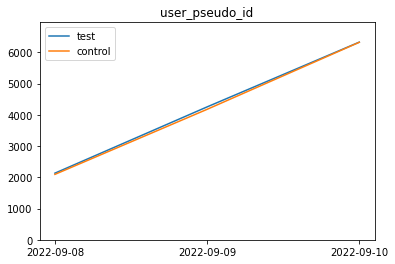

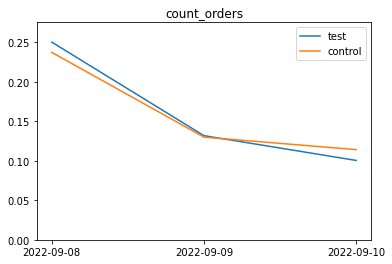

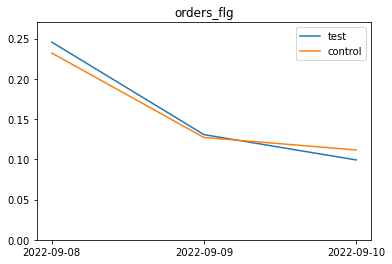

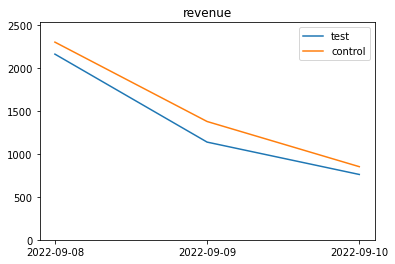

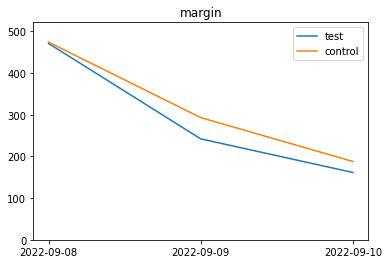

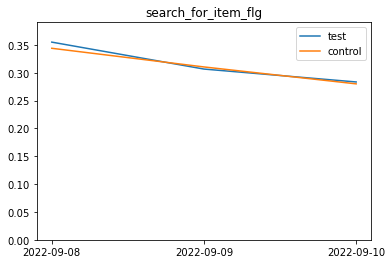

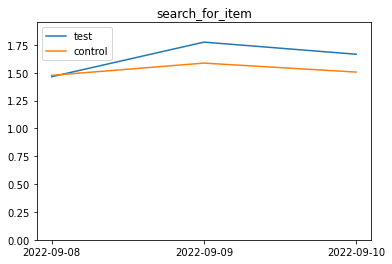

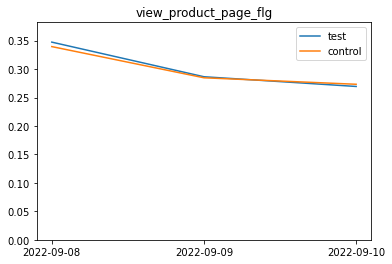

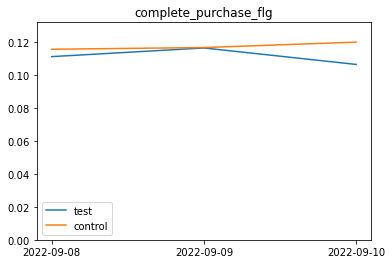

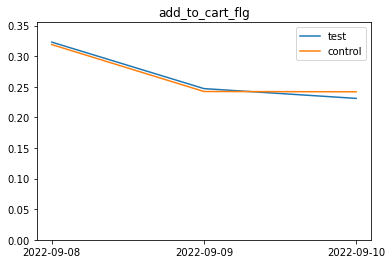

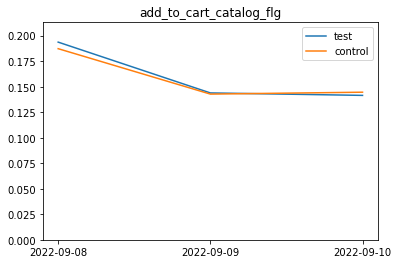

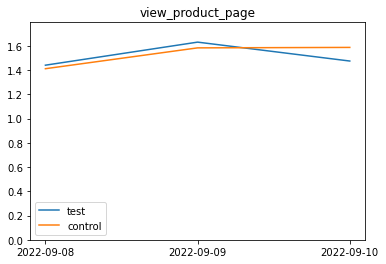

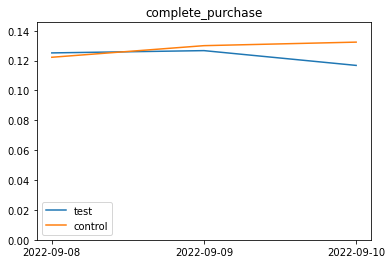

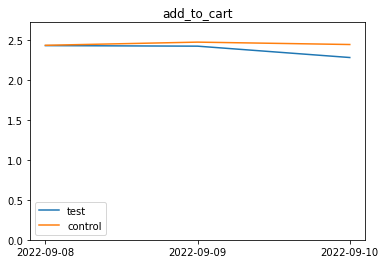

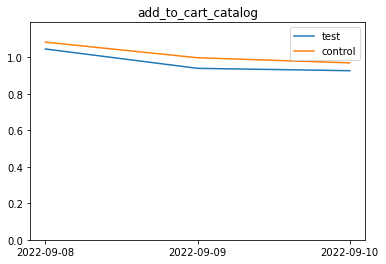

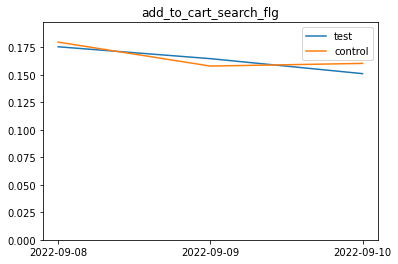

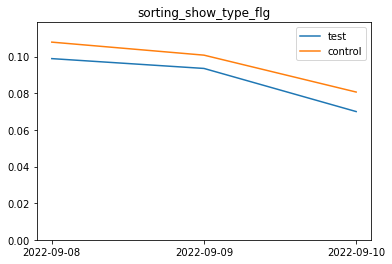

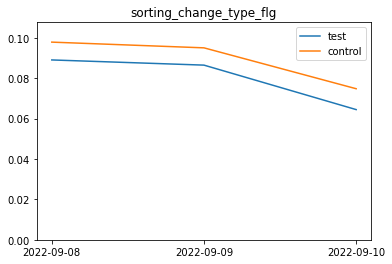

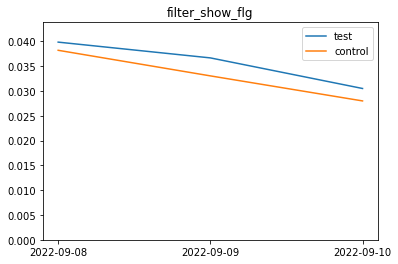

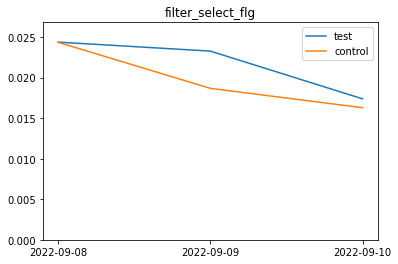

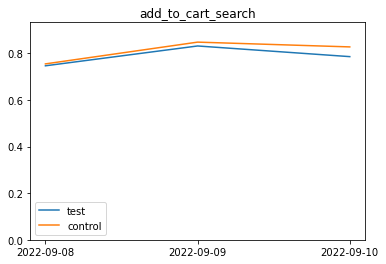

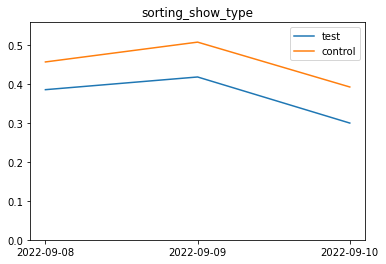

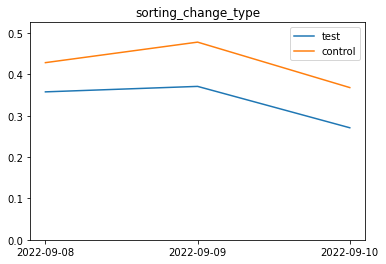

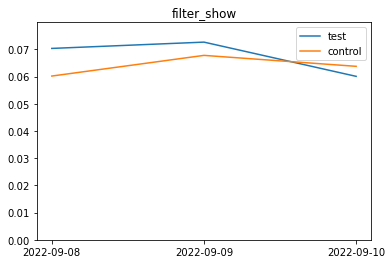

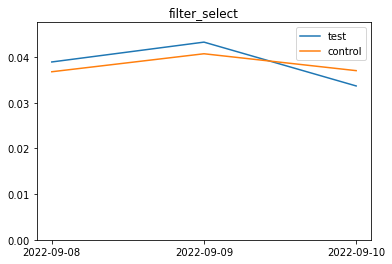

In [72]:
import numpy as np
import matplotlib.pyplot as plt


list_metrics = ['user_pseudo_id', 'count_orders', 'orders_flg','revenue', 'margin', 'search_for_item_flg', 'search_for_item', 'view_product_page_flg', 'complete_purchase_flg', 'add_to_cart_flg', 'add_to_cart_catalog_flg', 'view_product_page', 'complete_purchase', 'add_to_cart', 'add_to_cart_catalog', 'add_to_cart_search_flg','sorting_show_type_flg','sorting_change_type_flg','filter_show_flg','filter_select_flg','add_to_cart_search','sorting_show_type','sorting_change_type','filter_show','filter_select']

for i in range(0,len(list_metrics),1):
    x = list(test_ios['dt'])
    test = list(test_ios[list_metrics[i]])
    control = list(control_ios[list_metrics[i]])


    fig, ax = plt.subplots()

    # Using set_dashes() to modify dashing of an existing line
    line1 = ax.plot(x, test, label='test')

    # Using plot(..., dashes=...) to set the dashing when creating a line
    line2 = ax.plot(x, control , label='control')
    plt.title(list_metrics[i])
    if np.max(control_ios[list_metrics[i]]) > np.max(test_ios[list_metrics[i]]): 
        ax.set_ylim(0,1.1*np.max(control_ios[list_metrics[i]]))
    else:
        ax.set_ylim(0,1.1*np.max(test_ios[list_metrics[i]]))

    ax.legend()
    plt.show()

In [63]:
в старом каталоге в контроле стоимость за кг 

SyntaxError: invalid syntax (673458626.py, line 1)

In [ ]:
- конфиги встают после перезапуска приложения 

In [73]:
df = pd.read_csv('bq-results-20220919-083050-1663576362887.csv') 
df1 = pd.read_csv('items-orders.csv') 
df1['count_orders1'] = df1['count_orders']
df1 = df1[['user_id', 'count_orders_with_promo', 'count_items', 'count_items_with_promo', 'sum_count_items_', 'sum_count_items_with_promo', 'count_orders1']]
df_full = df.join(df1.set_index('user_id'), how = 'left', on = 'user_id')

df_full

,test,group_field,os,user_pseudo_id,user_id,count_orders,revenue,margin,view_product_page_flg,complete_purchase_flg,add_to_cart_flg,view_product_page,complete_purchase,add_to_cart,count_orders_with_promo,count_items,count_items_with_promo,sum_count_items_,sum_count_items_with_promo,count_orders1
0,141,1,Android,dc8f84fe01ae2e3ab3c78152ec014af2,95356041,18,74165.60,21573.82,1,1,1,3,13,100,19.0,164.0,66.0,868.0,418.0,20.0
1,142,0,iOS,E3128B1937FF4B3D9A00D257BF8DF228,96498217,13,67537.55,13480.40,1,1,1,32,9,65,14.0,126.0,110.0,932.0,810.0,15.0
2,141,1,Android,331b58ebce50a0dd99aeea6deeb09e4c,96325449,8,17277.93,8598.84,1,1,1,8,7,28,10.0,49.0,39.0,525.0,501.0,10.0
3,141,1,Android,be6d3c5439b22f4da5e285899cffc30d,100604159,4,25695.29,8455.90,1,1,1,2,3,52,4.0,60.0,24.0,210.0,104.0,4.0
4,142,0,iOS,A598FCA0BBCA4F42915A5C74BCDCCE2F,98156608,10,24746.32,7225.08,1,1,1,7,11,65,12.0,69.0,27.0,308.0,131.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99261,142,0,iOS,80C7F6D3053E40BAA67087DABF6C5292,96489562,1,901.57,-3261.69,1,1,1,12,1,3,1.0,3.0,2.0,14.0,13.0,1.0
99262,141,0,Android,87e229401559744d008e5a1c077125c6,101017057,1,9165.83,-3667.88,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0
99263,141,0,Android,d9a251ab5d522682a4cd9d9e98908ff0,97270120,1,1530.15,-3809.79,1,1,1,7,1,17,1.0,11.0,11.0,51.0,51.0,1.0
99264,141,0,Android,a850cddba95dcf0cc9879bb4638e3ff6,99394283,2,2559.12,-4411.42,1,0,1,1,0,5,2.0,2.0,2.0,20.0,20.0,2.0


In [74]:
list_user_pseudo_id = list(df_full['count_orders'])

count_orders1=[]
count_orders_with_promo=[]
count_items=[]
count_items_with_promo=[]
sum_count_items_=[]
sum_count_items_with_promo=[]
for i in range(0,len(list_user_pseudo_id)):
    if np.isnan(df_full['count_orders_with_promo'][i]):
        count_orders1.append(0)
        count_orders_with_promo.append(0)
        count_items.append(0)
        count_items_with_promo.append(0)
        sum_count_items_.append(0)
        sum_count_items_with_promo.append(0)
    else:
        count_orders1.append(df_full['count_orders1'][i])
        count_orders_with_promo.append(df_full['count_orders_with_promo'][i])
        count_items.append(df_full['count_items'][i])
        count_items_with_promo.append(df_full['count_items_with_promo'][i])
        sum_count_items_.append(df_full['sum_count_items_'][i])
        sum_count_items_with_promo.append(df_full['sum_count_items_with_promo'][i])
df_full['count_orders1'] = count_orders1
df_full['count_orders_with_promo'] = count_orders_with_promo
df_full['count_items'] = count_items
df_full['count_items_with_promo'] = count_items_with_promo
df_full['sum_count_items_'] = sum_count_items_
df_full['sum_count_items_with_promo'] = sum_count_items_with_promo

In [75]:
list_user_pseudo_id = list(df_full['user_pseudo_id'])
bakets =[]
test_group = []
for i in range(0,len(list_user_pseudo_id)):
    bakets.append(hash(list_user_pseudo_id[i])%3000)
#     if df['group_field'][i] == 1:
#         test_group.append(1)
#     else:
#         test_group.append(0)
df_full['bakets'] = bakets
# df['group_field'] = test_group

In [76]:
df3_android = df_full[df_full['os'] == 'Android']
df3_ios = df_full[df_full['os'] == 'iOS']
control_android = df3_android[df3_android['group_field'] == 0]
test_android = df3_android[df3_android['group_field'] == 1]
control_ios = df3_ios[df3_ios['group_field'] == 0]
test_ios = df3_ios[df3_ios['group_field'] == 1]

In [77]:
control_android = control_android.groupby(['bakets','user_pseudo_id']).sum()[['count_orders1', 'count_orders_with_promo', 'count_items', 'count_items_with_promo', 'sum_count_items_', 'sum_count_items_with_promo']].reset_index()
test_android = test_android.groupby(['bakets','user_pseudo_id']).sum()[['count_orders1', 'count_orders_with_promo', 'count_items', 'count_items_with_promo', 'sum_count_items_', 'sum_count_items_with_promo']].reset_index()
control_ios = control_ios.groupby(['bakets','user_pseudo_id']).sum()[['count_orders1', 'count_orders_with_promo', 'count_items', 'count_items_with_promo', 'sum_count_items_', 'sum_count_items_with_promo']].reset_index()
test_ios = test_ios.groupby(['bakets','user_pseudo_id']).sum()[['count_orders1', 'count_orders_with_promo', 'count_items', 'count_items_with_promo', 'sum_count_items_', 'sum_count_items_with_promo']].reset_index()

# control_android = control_android[control_android['count_orders1'] > 0]
# test_android = test_android[test_android['count_orders1'] > 0]
# control_ios = control_ios[control_ios['count_orders1'] > 0]
# test_ios = test_ios[test_ios['count_orders1'] > 0]




In [87]:

control_bakets = control_ios.groupby('bakets').mean()['count_orders_with_promo']
test_bakets = test_ios.groupby('bakets').mean()['count_orders_with_promo']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

control_bakets = control_android.groupby('bakets').mean()['count_orders_with_promo']
test_bakets = test_android.groupby('bakets').mean()['count_orders_with_promo']
print(stats.ttest_ind(control_bakets, test_bakets))
print(test_bakets.mean(),control_bakets.mean() )

Ttest_indResult(statistic=-0.04965576580877411, pvalue=0.9603984024865582)
0.24533481833995563 0.2449770375623627
Ttest_indResult(statistic=3.33030490676165, pvalue=0.0008727482603312442)
0.31051348286200486 0.32431385636606047


In [7]:
df1 = pd.read_csv('bq-results-20221011-143732-1665499067883.csv') 
df = pd.read_csv('items-orders1.csv') 
df_full = df.join(df1.set_index('buyer_id'), how = 'inner', on = 'buyer_id')



In [10]:
df_full = df_full.reset_index()[['buyer_id', 'phone']]

,buyer_id,phone
0,99049636,7.983181e+10
1,94762356,7.927622e+10
2,94916332,7.953411e+10
3,95049057,7.981882e+10
4,95306682,7.913305e+10
...,...,...
316610,102438790,7.981855e+10
316611,94641345,7.901300e+10
316612,102441024,7.987749e+10
316613,102440528,7.916599e+10


In [12]:
df_full.to_csv('result_phone_exp_loylity.csv')